<a href="https://colab.research.google.com/github/anebawk/DS_Projects/blob/main/Project_SLC_DSBA_INNHotels_FullCode_Kwabena_Dwaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

### Importing the dataset

In [ ]:
# importing the dataset.
hotel = pd.read_csv('/Users/coby/Desktop/PGP-DSBA_Texas/Supervised Learning/Decision Tree/LGDC project/INNHotelsGroup.csv.xls')

In [ ]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

### View the first and last 5 rows of the dataset

In [ ]:
# checking the firt few rows of the dataset
data.head().T

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


In [ ]:
# check the last few rows of the the dataset
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Checking and understanding the shape of the dataset

In [ ]:
#checking the shape of the data
data.shape

(36275, 19)

The data consist of 36275 rows and 19 columns

In [ ]:
### Check the data types of the columns for the dataset

In [ ]:
# chcking the data types of the columns in the the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- The are 5 object type  and 14 numerical colums in the dataset

In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

- There are no duplicates rows in the dataset

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- The are no missing values in the dat set

#### Dropping Booking_ID column first before moving ahead

In [ ]:
#dropping Booking_ID
data = data.drop(['Booking_ID'], axis=1)

In [ ]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


### Let's check the statistical summary of the data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


- `avg_price`: Average price per room in the data set is 35.42 euros. Price ranges from 35,09 to 540 euros.

- `lead time`: The average lead time is 85.2 days,maximum lead time is 443. The large difference between the 75th        percentile and maximum value indicates that there might be outliers.

- `week_night`: Average weeknight is 2.2 night. 75% of guest spent 2 week nights, and th maximum is 7 nights.

- `weekend_night`:Average weekend nights is less than a 1. 75% of guests spent 3 weekend night with the maximum been      17.

- `previous booking canceled`: This ranges from a minimum of 0 to 13 maximum with 25%, 50% and 75% percentiles            observation been 0.

- `previous booking not canceled`:Similar to previous booking canceled it ranges form o to 58 with 25%, 50% and 75%      percentiles observation been 0. This may also indicte the presences of outliers

## Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along same scale
def histogram_boxplot(data, feature, figsize =(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe columns
    figsize: size of the figure(default(15,10))
    kde: whether to show a density curve(default False)
    bins: number of bins for the histogram(default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, # Number of rows of the subplot grid= 2
        sharex=True, # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )# creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )# creating the boxplot with a triangle indicating the mean of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x= feature, kde=kde, ax=ax_hist2
    ) # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )# Indicating the mean of the histogram
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    ) # Indicating the median of the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Lead Time

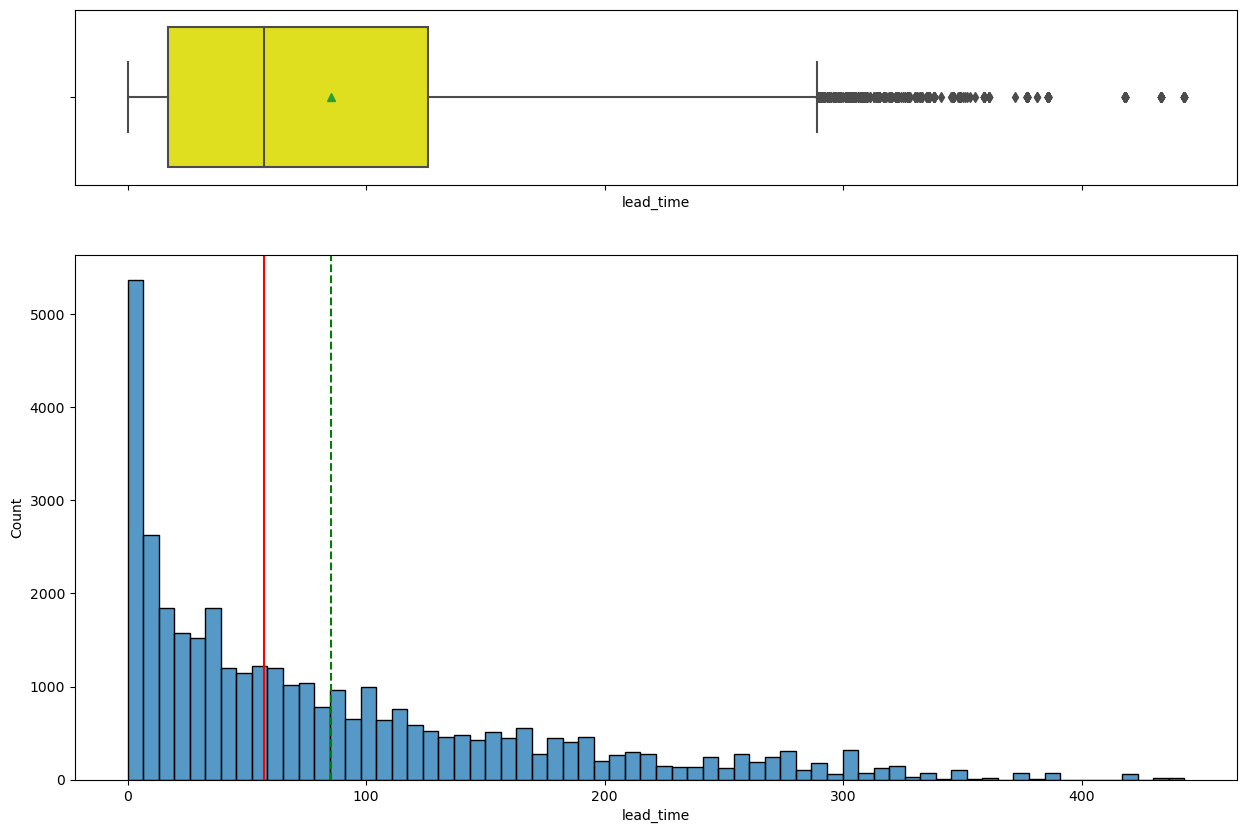

In [ ]:
histogram_boxplot(data, "lead_time")

- The average lead time is 85 days before arrival date.
- The lead time for 50% of all bookings was 57 days
- Distribution for lead time is right-skewed with some outliers

### Average price per room

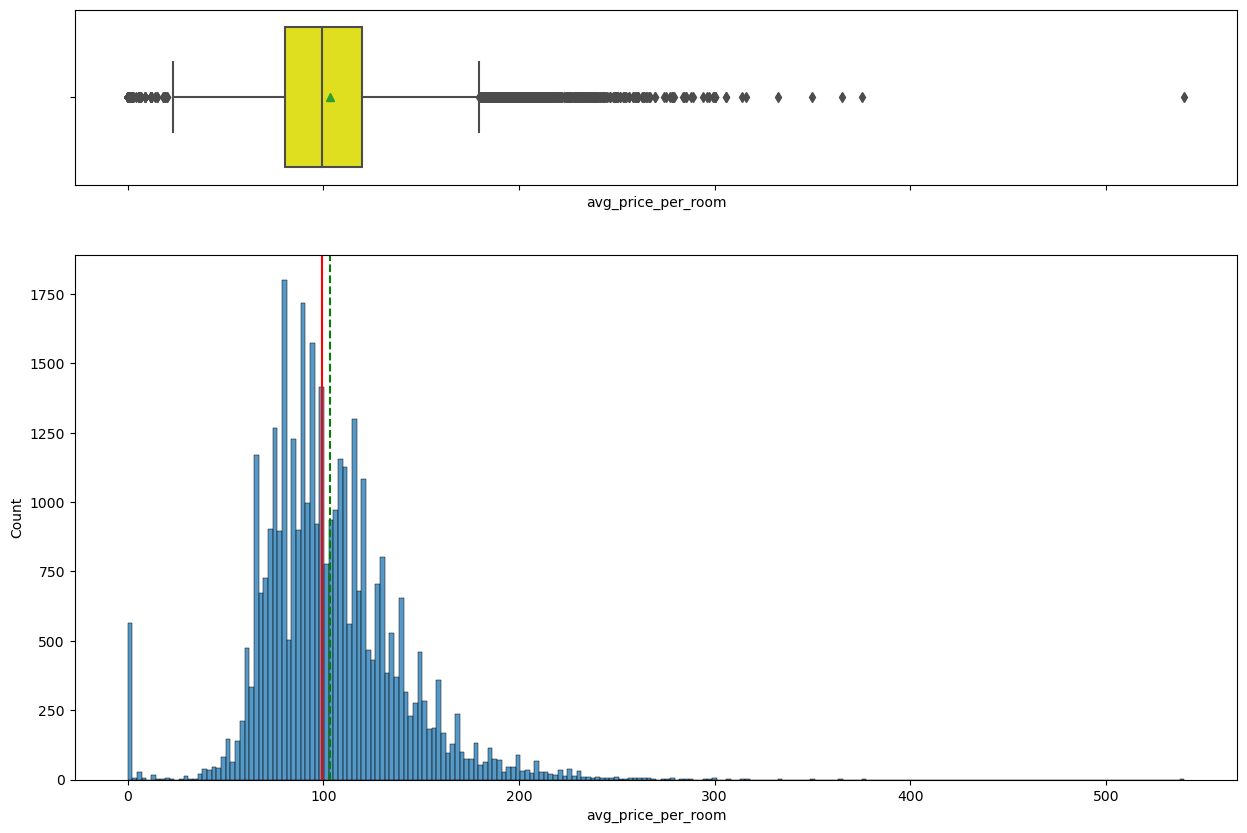

In [ ]:
histogram_boxplot(data, "avg_price_per_room")

- The distribution of average price per booking is close to normal with a flatter tail to the right.
- Average price per room is 103.34 euros. 50% of rooms were price at 94.45 euros while the most priced room was 540     euros
- There seems to be bookings where average price per room is 0 so we need to find out.

In [ ]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


- There are 545 rows with an average price per room of 0 euros.

#### Let's find the maket segment making up the nil average price per room.

In [ ]:
# chcking the market segment responsible for nill average cost per room
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

- complimentary has 354 bookings with nil average price per room whiles Online has 191 bookings with nill average       price per romm

In [ ]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

0        42.05000
1       146.25000
2        29.55000
3       129.55000
4       115.80000
           ...   
36270   299.05000
36271   106.92500
36272   125.52500
36273   115.80000
36274   283.72500
Name: avg_price_per_room, Length: 36275, dtype: float64

In [ ]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

### Number of previous booking cancellations

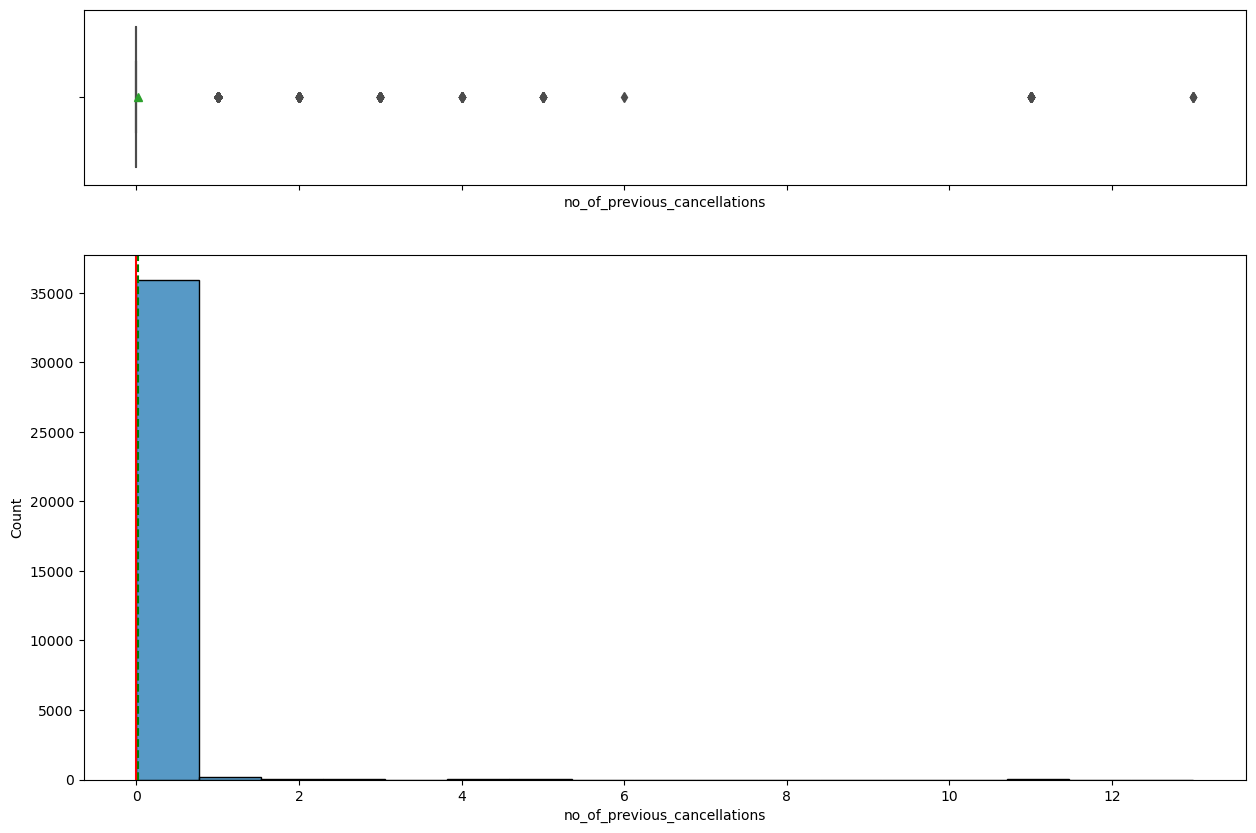

In [ ]:
histogram_boxplot(data, "no_of_previous_cancellations")

### Number of previous booking not canceled

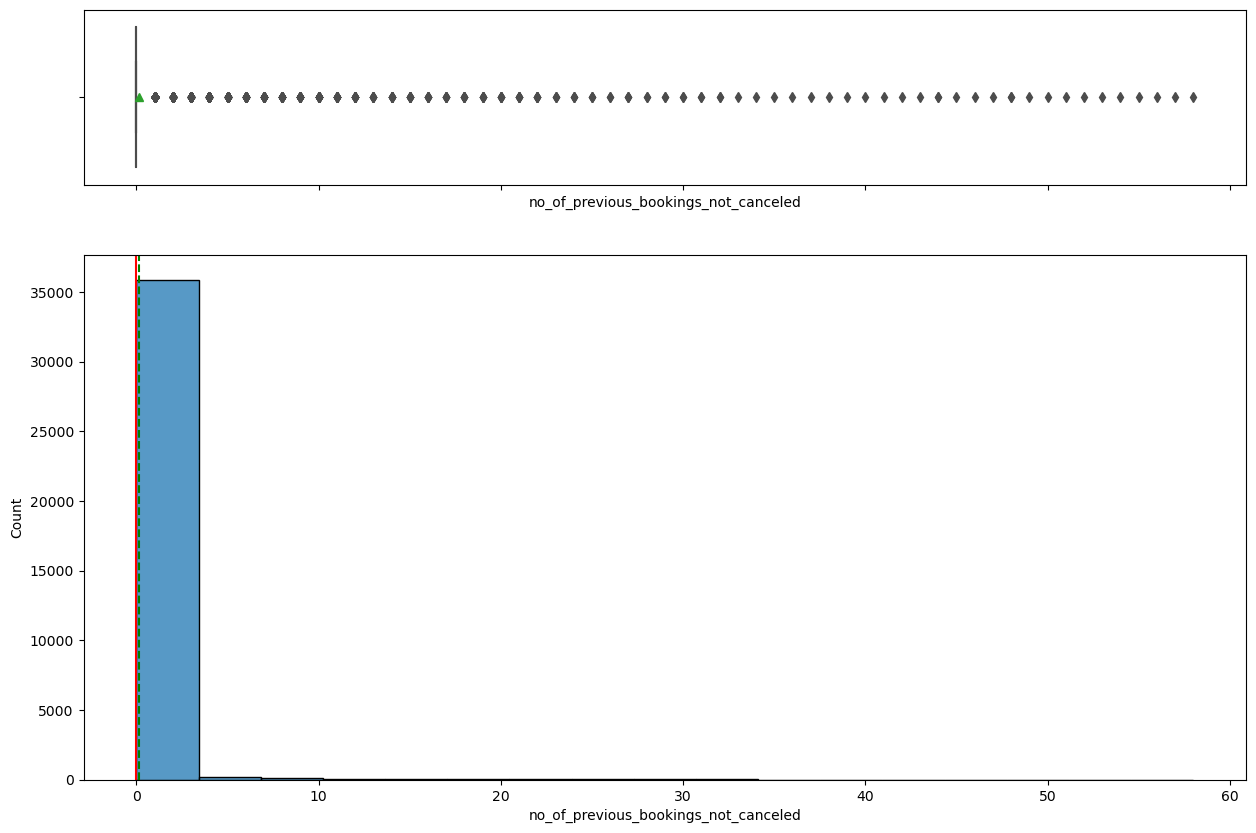

In [ ]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

- Previous booking canceled has a right-skewed distribution, with it median, 25th and 75th percentiles all at 0

### Number of Adult

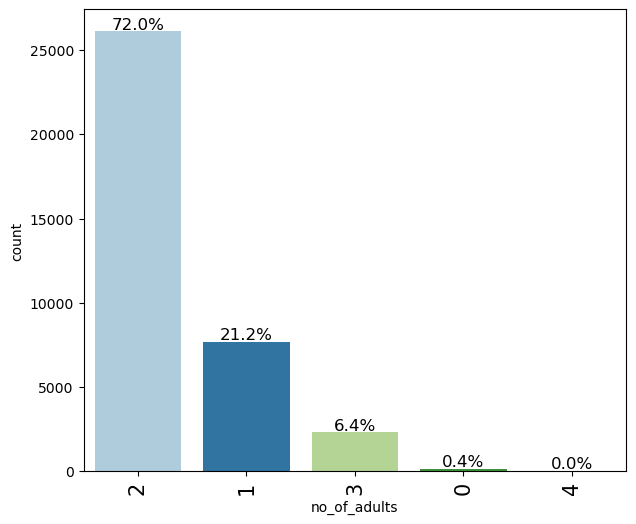

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)

- 72% of the booking were for 2 adults which is highest, followed by 1 adult representing 21.2% and 6.4% for 3 adults

### Number of children

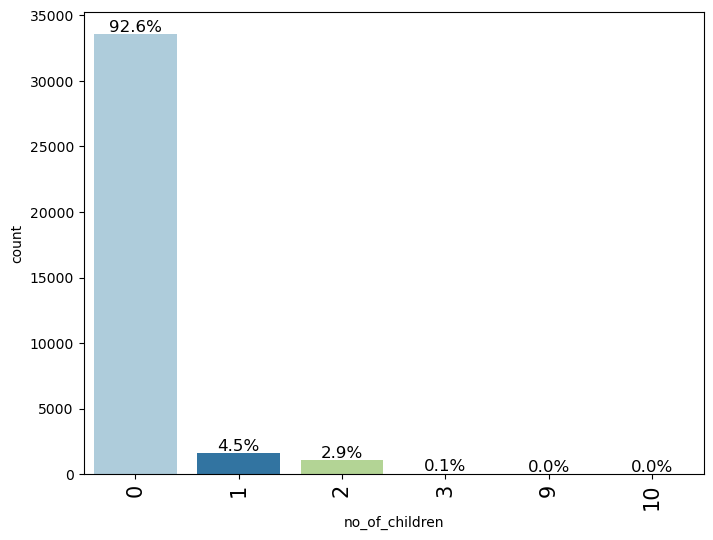

In [ ]:
labeled_barplot(data, "no_of_children", perc=True)

- 92.6% of bookings were without children, 4.5% were with 1 child followed by 2.9% representing 2 children

### Week Nights

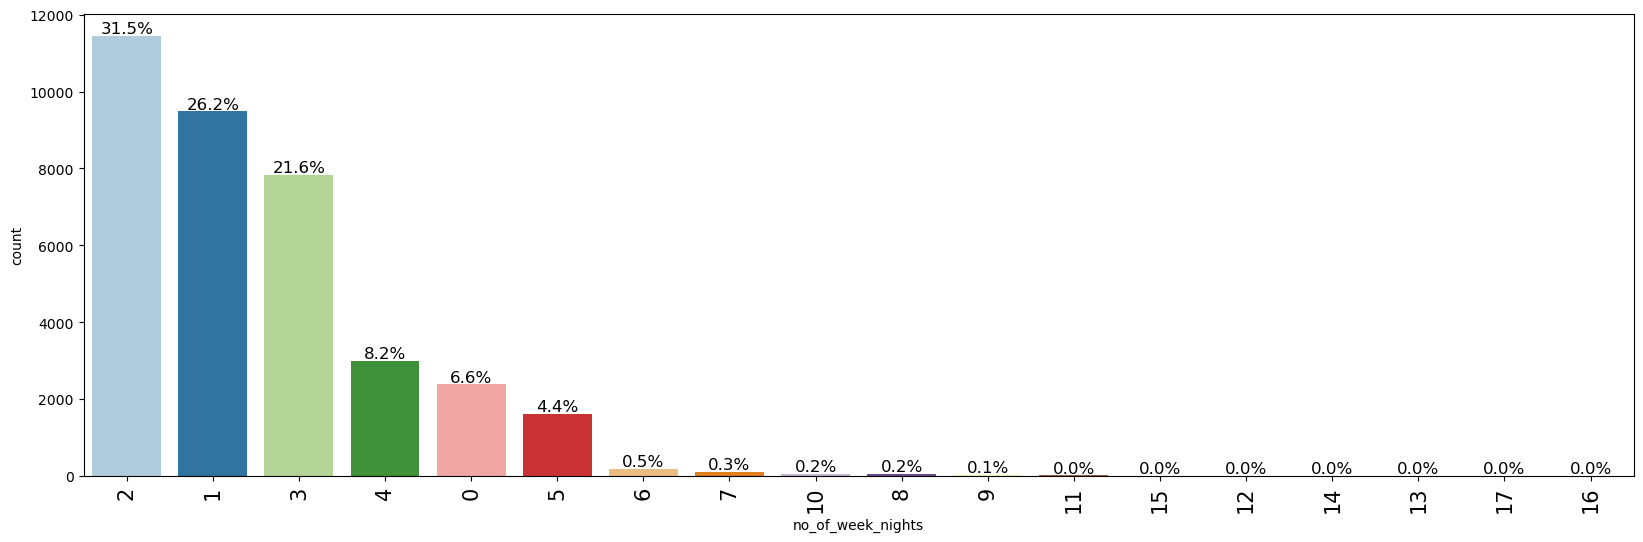

In [ ]:
labeled_barplot(data, "no_of_week_nights", perc=True)

- 31.5%  of the booking during week nights are for two nights,
- 26.2% are for just a night and 21.6% 3 night

### Weekend Nights

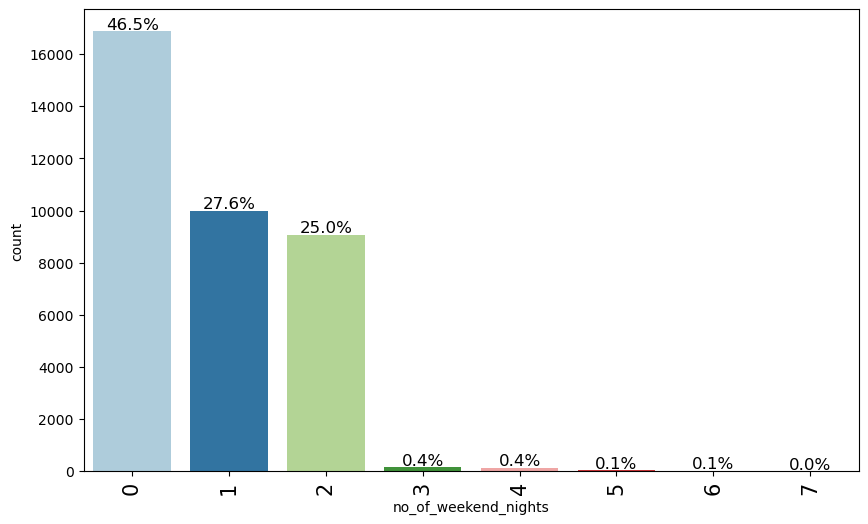

In [ ]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

27.6% of the bookings on weekend nights were for just a night.
25% of them were for 2 night stay.
46.5% represent a booking on a weekend but customrs did not spend any night.

### Car parking space

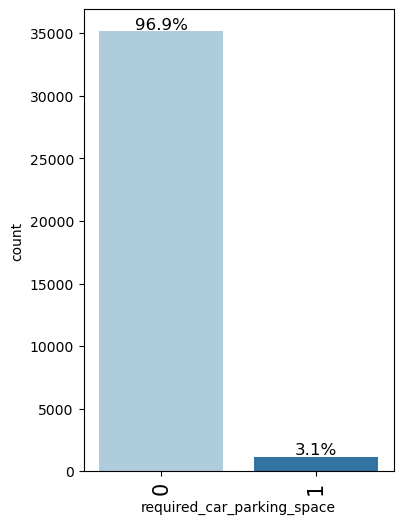

In [ ]:
labeled_barplot(data, "required_car_parking_space", perc=True)

- 96% of the bookings were without car parking space requirement while only 3.1% required a car parking space.

### Types of meal plan

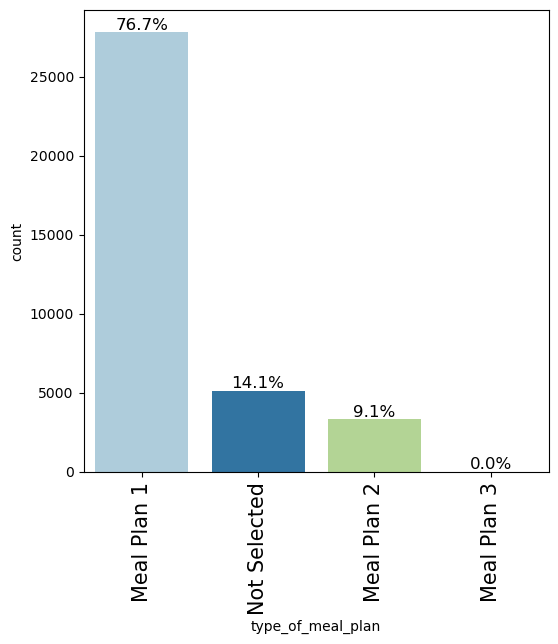

In [ ]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

- 76.7% selected Meal Plan 1(Breakfast), 14.1% did not select any plan, 9.1% selected plan 2(Half board), whiles 0.1%   opted for plan 3(Full board)

### Room type reserved

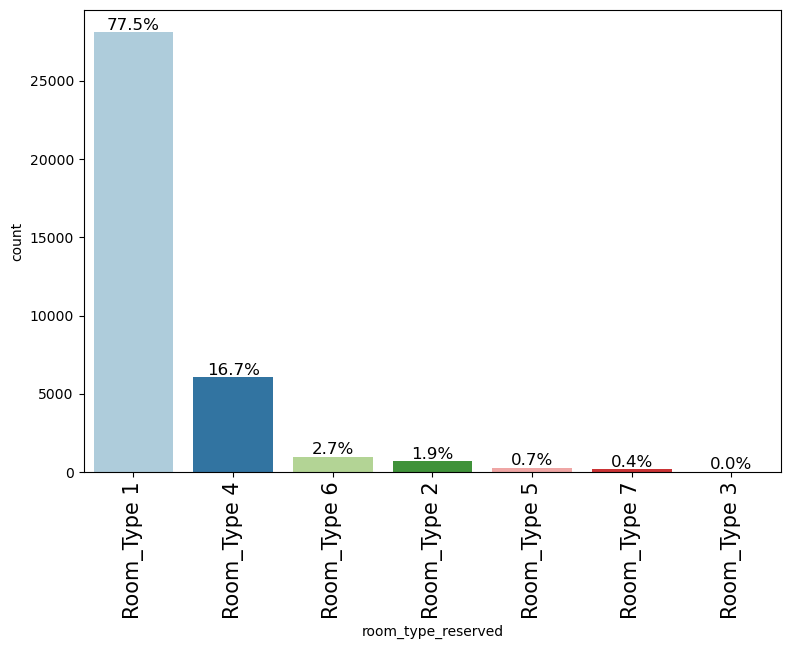

In [ ]:
labeled_barplot(data, "room_type_reserved", perc=True)

- 77.5% reserved room type 1 which is highest reservation type. This is followed by room type 4 representing 16,7% and   room type 6 repesenting 2.7%.

### Arrival month

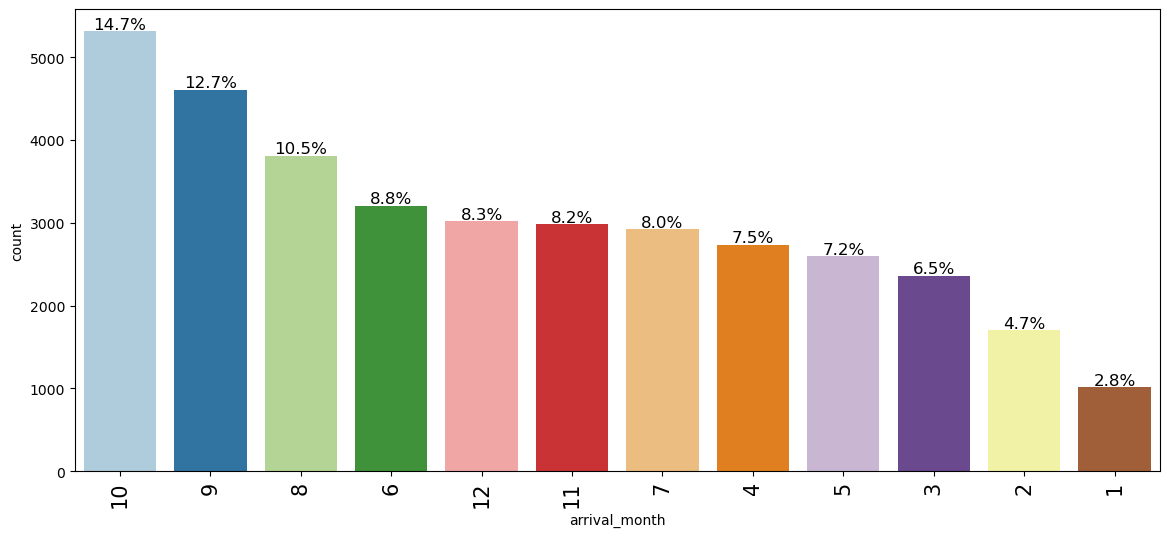

In [ ]:
labeled_barplot(data, "arrival_month", perc=True)

- October which the 10th month has the highest arrivals representing 14.7%. This follwed by september with 12.7% and     10.5% in August. June,December, Novmeber and july had 8.8%, 8.3%,8.2% and 8% respectively. January had the least       arrivals of 2.8%

### Market Segment Type

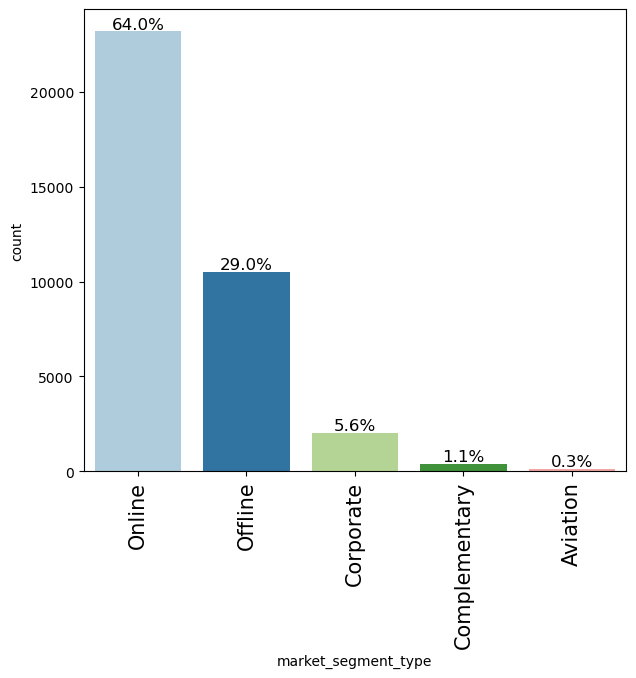

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)

- Online has the highest number of bookings representing 64.0% this is followed by offline representing 29.0%.           Corporates booking stood at 5.6% whiles complementary and aviation had 1.1% and 0.3% respectivley

### Number of special request

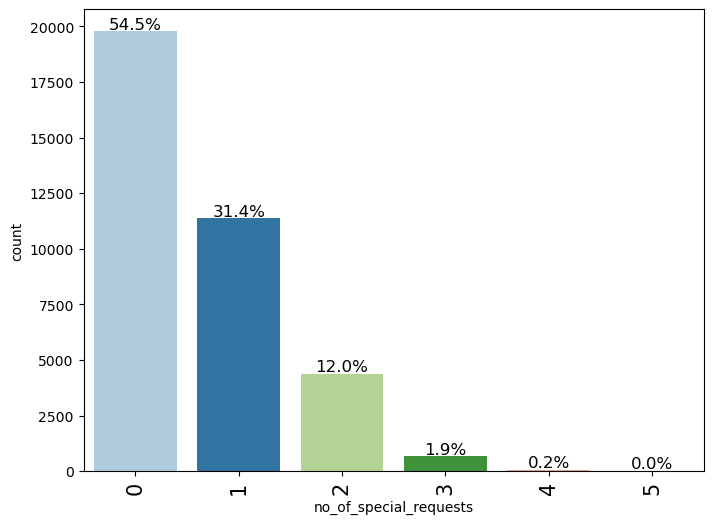

In [ ]:
labeled_barplot(data, "no_of_special_requests", perc=True)

- 54.5% of booking did not make special request, 31.4 made 1 request , 12% made two requst 1.9% made 4 request.

### Booking Status

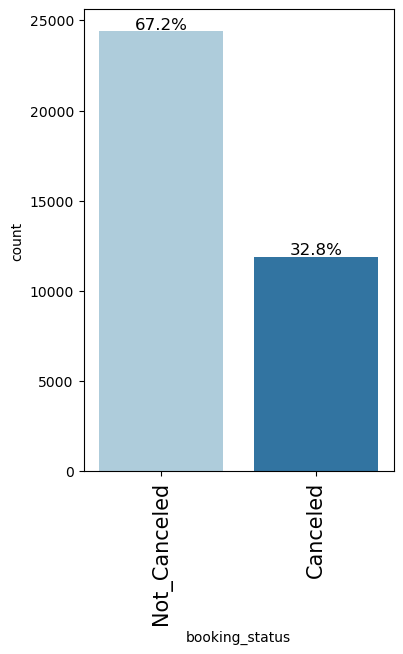

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

- 67.2% of booking were not canceled whiles 32.8% were canceled

### Encoding boking status

In [ ]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

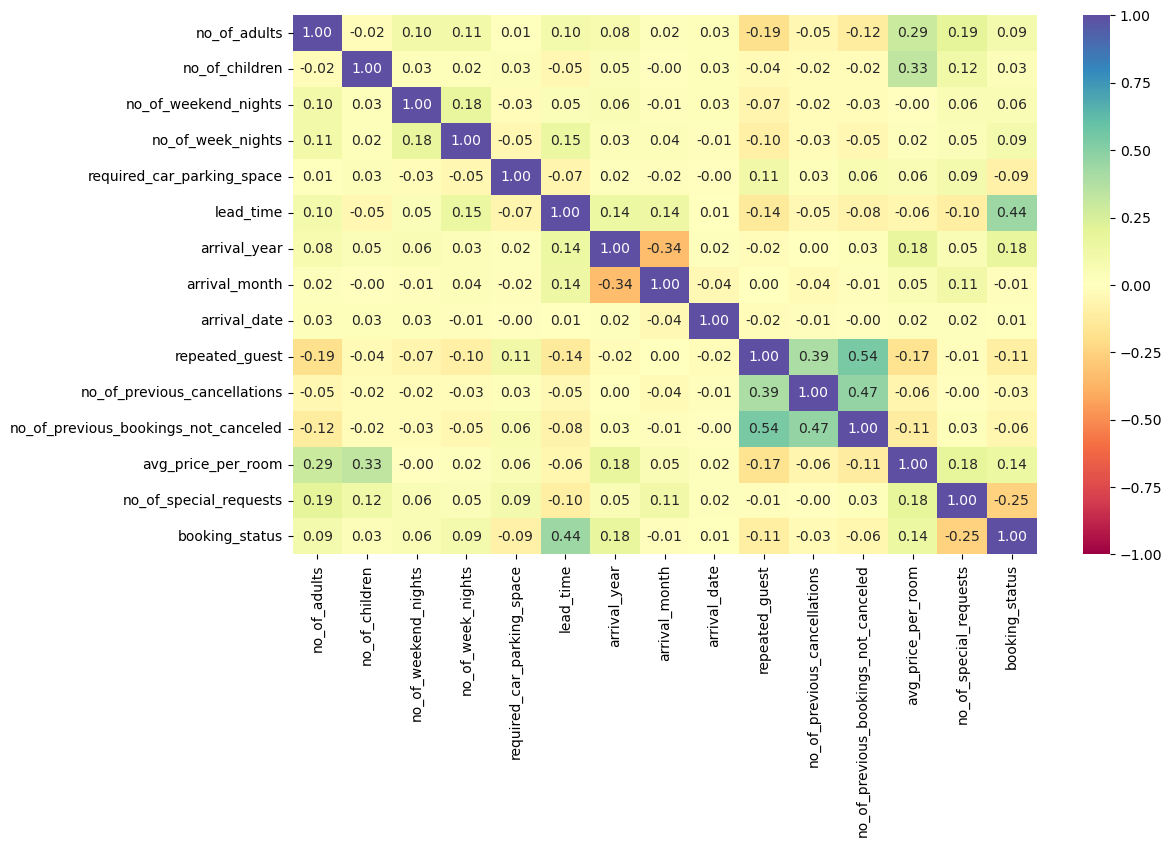

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- There is slightly hihger correlation between repeated guest and no of  previous booking not cancleed.
- The are are not much correlation among the remaining columns.

### Function to help with further analysis

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False,
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###  How Booking Status  Across Varies Different Market Segment.

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


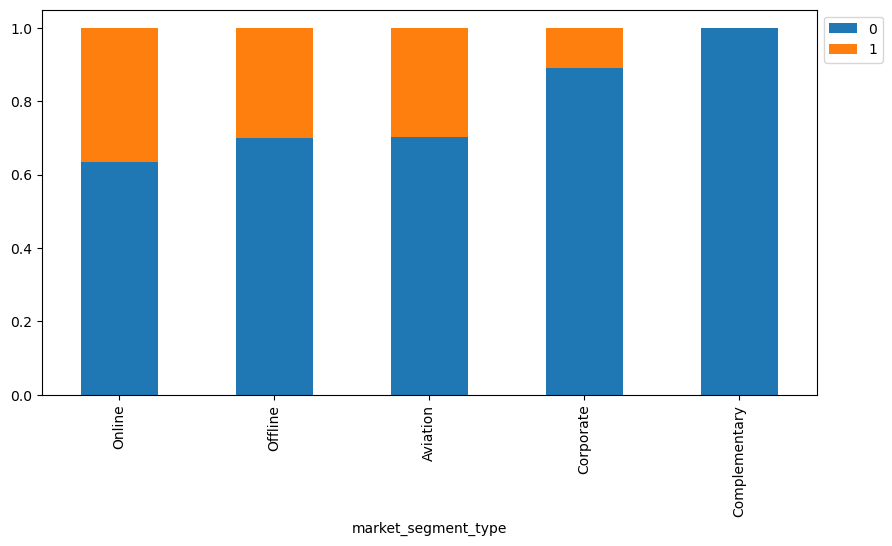

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

- 36% of the bookings from the online  were canceled which is the highest among the segments, This is followed by 30% from offline. complementary did not have any cancellations.

### Impact of guest special requirements on hotel room bookings

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


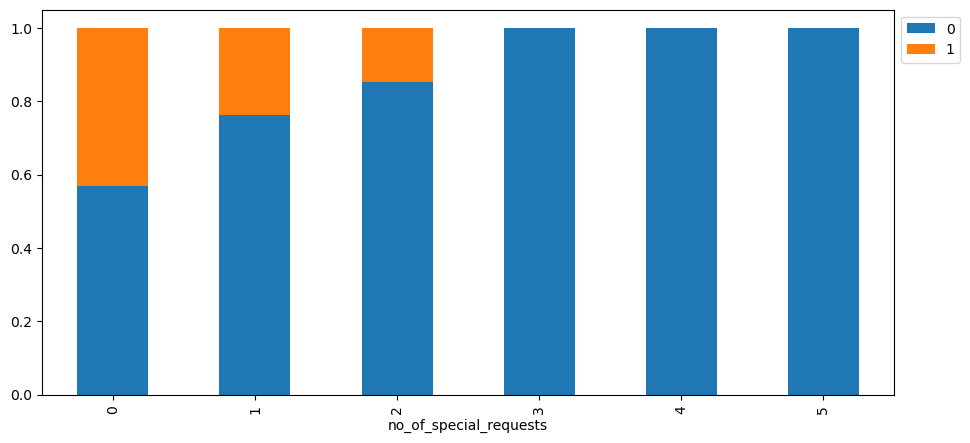

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

- 45% of booking without speceial requests were canceled, this follow by 23% form booking with 1 request and 15% from booking with 2 special requests

### Impact of special request on average price per room

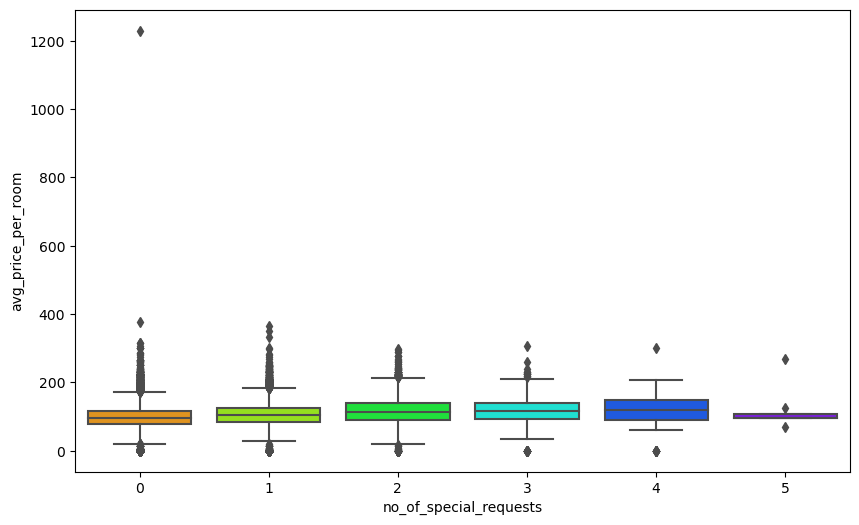

In [ ]:
### making a boxplot to visualized prices of room across diffirent segments,
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="no_of_special_requests", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

- Generally prices of rooms increases with the no of special request made

### Booking Status and Average price per room

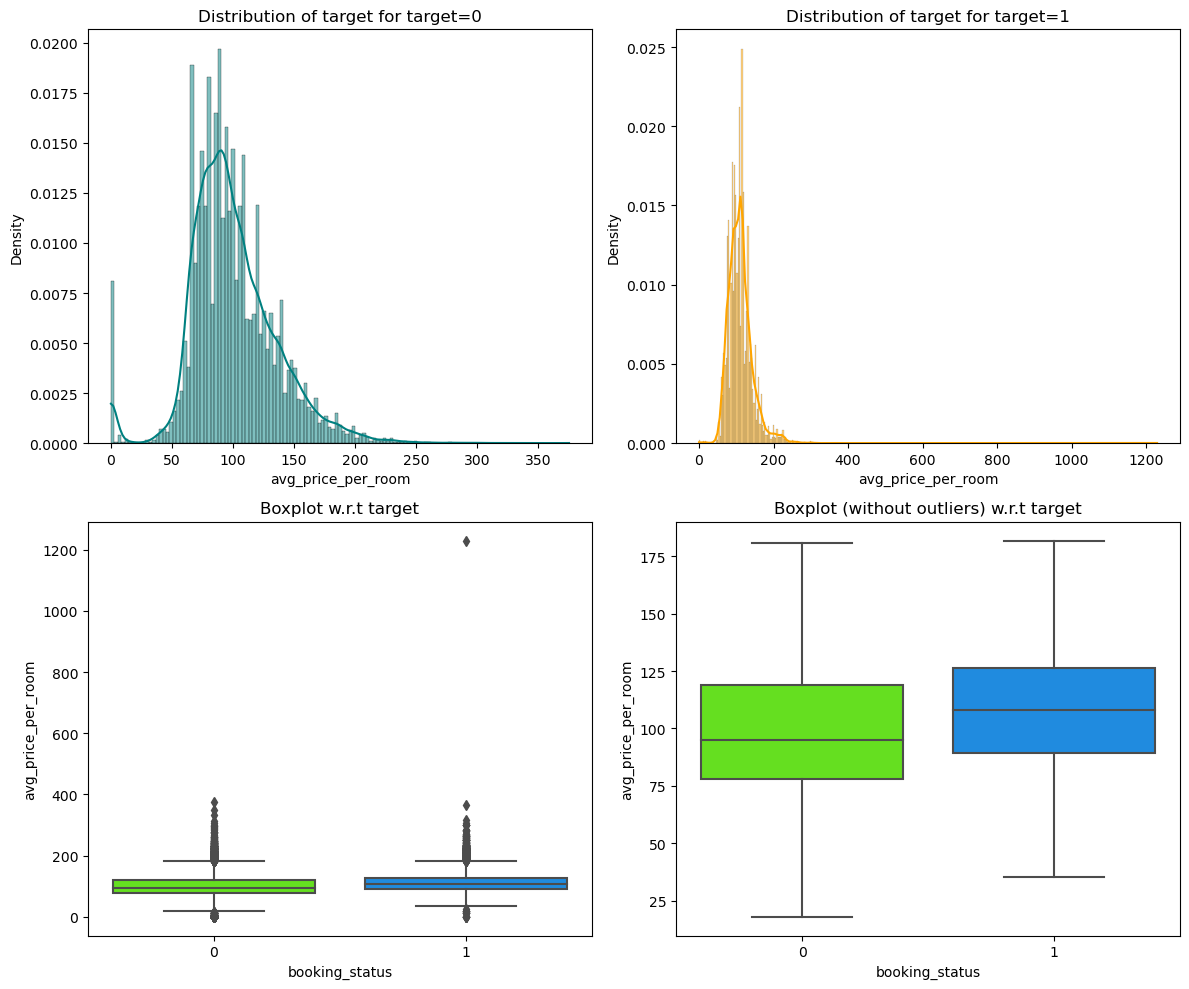

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

### Analysing Correlation between booking status and lead time.

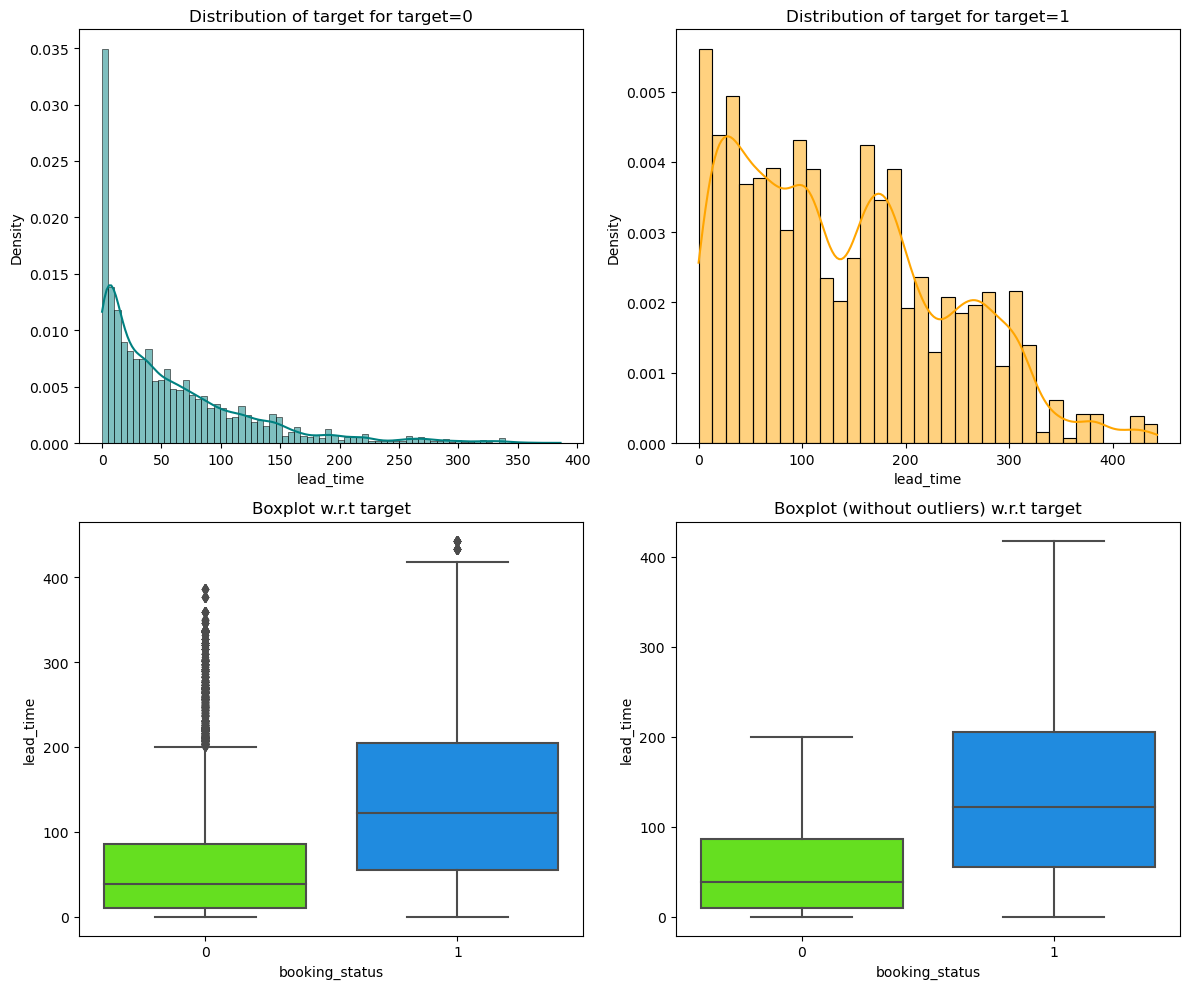

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

- guest who canceled their booking generally had a longer lead time with an average of around 120 days.
- guest who did not canceled their booking had an average of around 40 days

###  How family travels impact on booking status

In [ ]:
family_travels = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_travels.shape

(28441, 18)

In [ ]:
family_travels["no_of_family_members"] = (
    family_travels["no_of_adults"] + family_travels["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


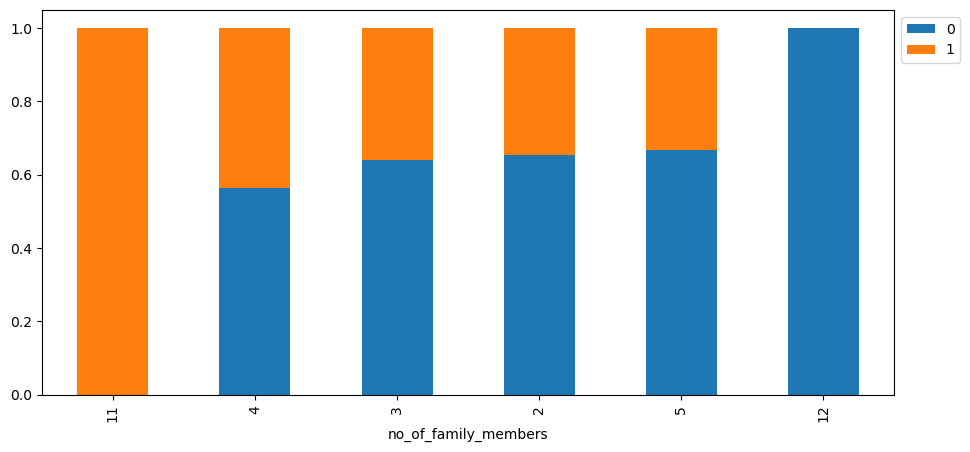

In [ ]:
stacked_barplot(family_travels, "no_of_family_members", "booking_status")

- families with 3, 2 and 5 members had almost 40% of their booking canceled
- famailies with 4 members had around 58% of their booking also canceled.

### Customers who stay for at least a day

In [ ]:
stay_at_least1_day = data[(data["no_of_week_nights"] >0 ) & (data['no_of_weekend_nights']>0)]
stay_at_least1_day.shape

(17094, 18)

In [ ]:
stay_at_least1_day['total_days'] = (
    stay_at_least1_day['no_of_week_nights'] + stay_at_least1_day["no_of_weekend_nights"])

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

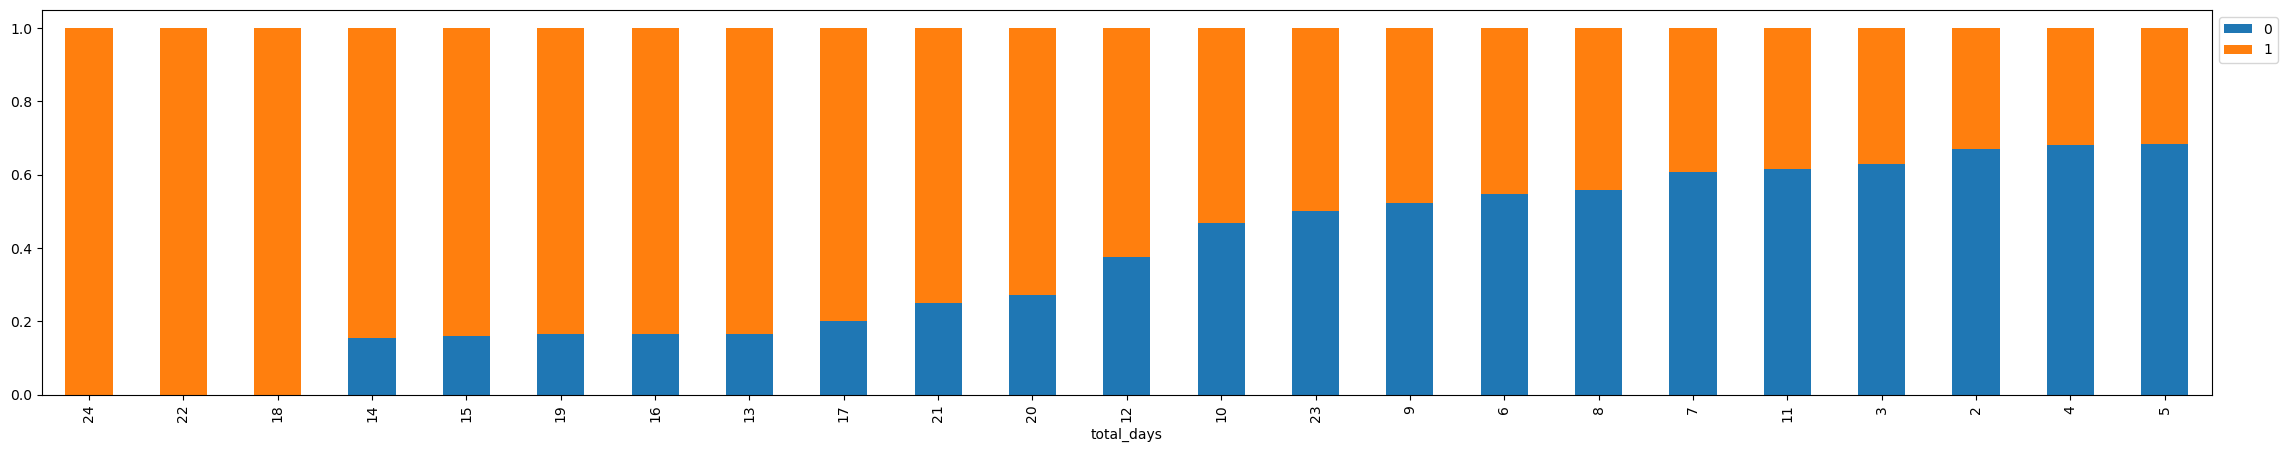

In [ ]:
stacked_barplot(stay_at_least1_day, 'total_days', 'booking_status')

- Generally the the fewer the no of days stayed, the less likely the the booking will be canceled

### Analyzing repeating guest and booking status

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


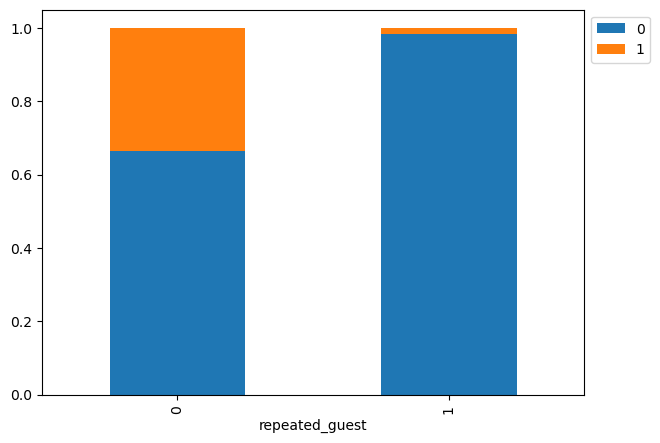

In [ ]:
stacked_barplot(data, 'repeated_guest', 'booking_status')

- About 1% of repeated guests canceled their booking, whiles around 37% of first time guest canceled their booking.


booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


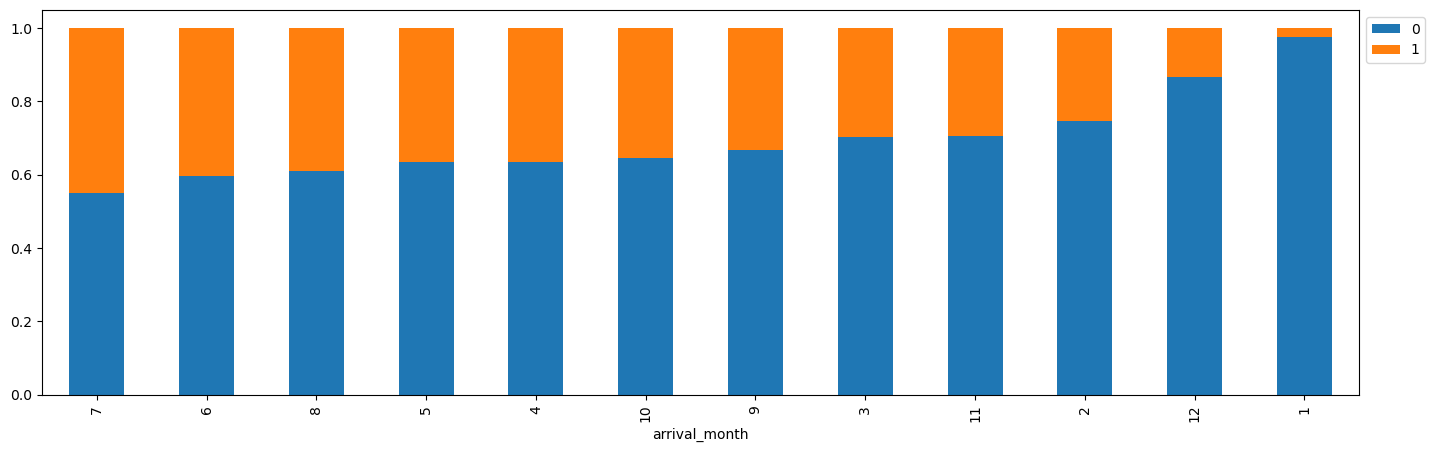

In [ ]:
stacked_barplot(data, 'arrival_month', 'booking_status')

- January has least cancellations of around less than 2 percent
- Follwoed by December with around 11% and then february with 25%
- The month with higest cancellations is July with around 43% cancellatiom This followed by June and May.

### How price vary across different months

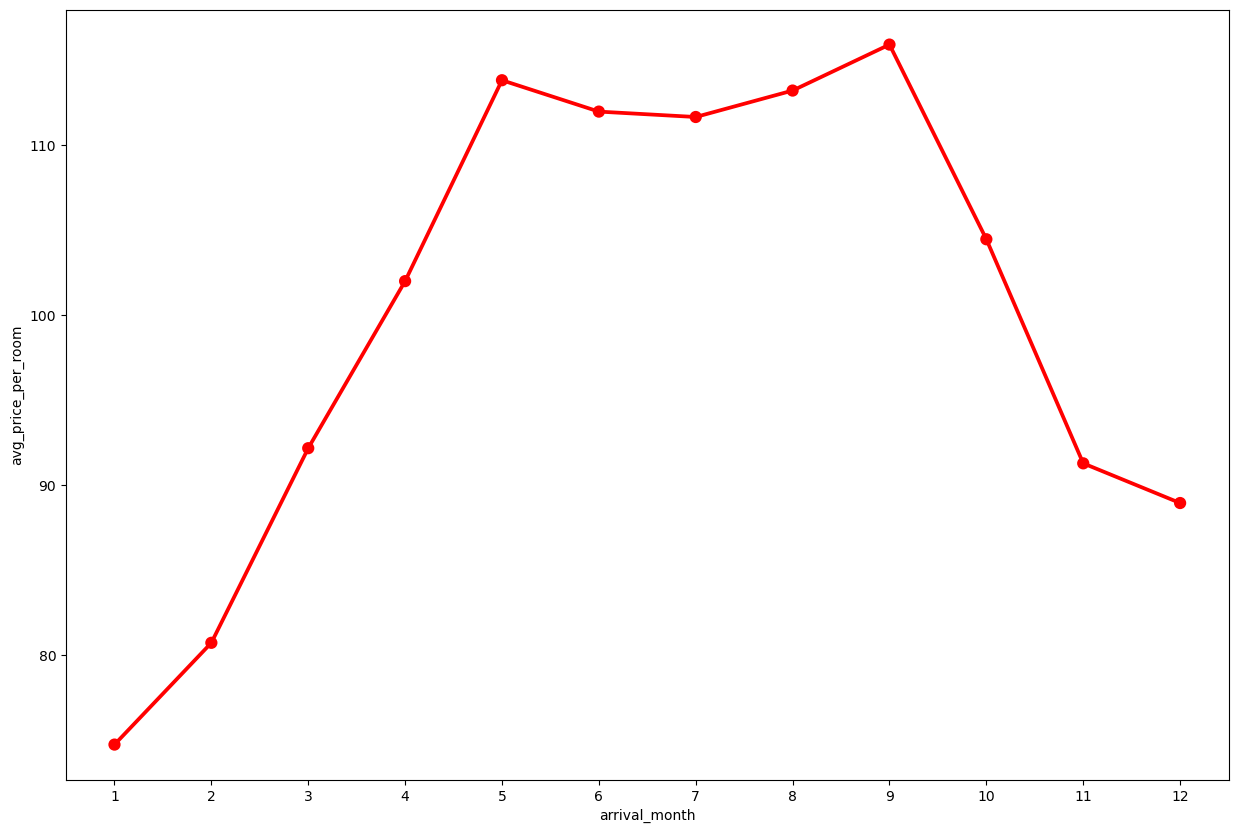

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(data= data, x='arrival_month', y='avg_price_per_room',ci= False, color="red")
plt.show()

- the month with the lowest price is January with less than 35 euros.
- september has the highest price per room with an average of above

### 1. The busiest months in the hotel

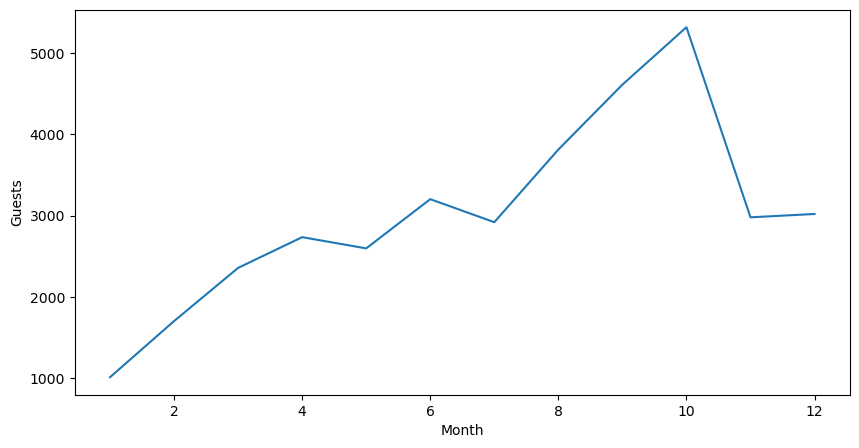

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

### 2.  Which market segment do most of the guest come form

In [ ]:
data["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

 - Most of the guest come from the Online segement with 23214 guest.

### 3.  What are the differences in room prices in different market segments?

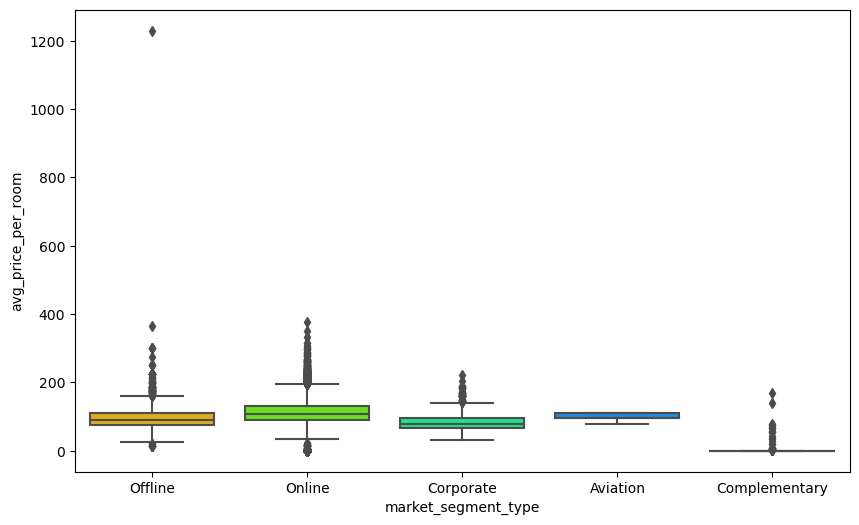

In [ ]:
### making a boxplot to visualized prices of room across diffirent segments,
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

- As we can see, the average price per room for online booking is the highest. 50% of online booking were priced         around 120 euros. This followed by Aviation bookings with 50% of booking having an average price per romm of around   100 euros.
- offline booking had an average price per hoom of 95 euros.
- The least price rooms were from complementary and corporate segment.

### 4.What percentage of bookings are canceled

In [ ]:
booking_canceled = data[data['booking_status']== 1]

# total number of booking canceled
booking_canceled.shape[0]

# calculate percentage booking canceled
perc_booking_canceled =(booking_canceled.shape[0]/data.shape[0])*100
print(round(perc_booking_canceled,2),'%')

32.76 %


- Overall about 32.76% of all booking were canceled.

### 5.What percentage of repeating guest cancel?

In [ ]:
# creating a dataframe for repeating guest
repeat_guest = data[data["repeated_guest"]==1]

# creating a dataframe for repeat guest canceled
repeat_guest_canceled = repeat_guest[repeat_guest["booking_status"]==1]

# total number of repeated guet who canceled
repeat_guest_canceled.shape[0]

# calculate percentage of repeated guest who canceled
perc_repeat_guest_cancel = (repeat_guest_canceled.shape[0]/repeat_guest.shape[0])*100
print(round(perc_repeat_guest_cancel,2),'%')

1.72 %


1.72% of repeated guests canceled their bookings.

### 6. Do special requirement affect booking cancellation

booking_status              0     1    All
no_of_special_requests                    
All                     18456  9985  28441
0                        7249  6930  14179
1                        7246  2457   9703
2                        3289   598   3887
3                         597     0    597
4                          67     0     67
5                           8     0      8
------------------------------------------------------------------------------------------------------------------------


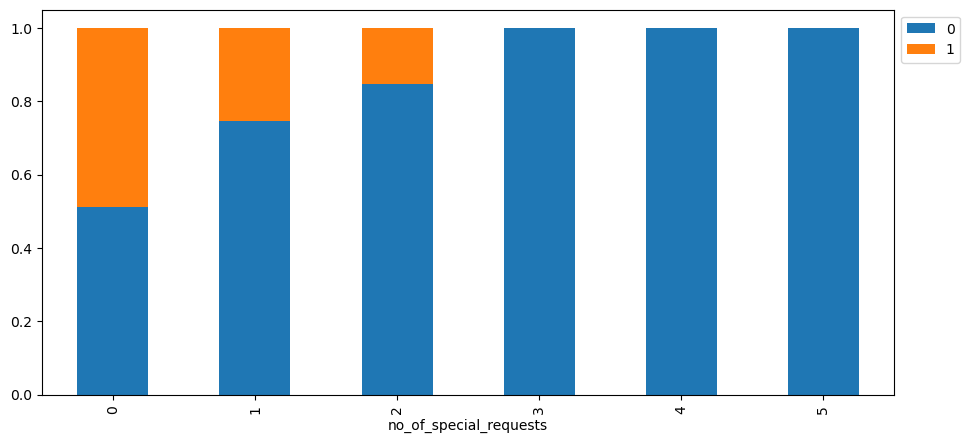

In [ ]:
stacked_barplot(family_travels, "no_of_special_requests", "booking_status")

- 45% of booking without speceial requests were canceled, this follow by 23% form booking with 1 request and 15% from   booking with 2 special requests

## Data Processing

### Outlier Checks

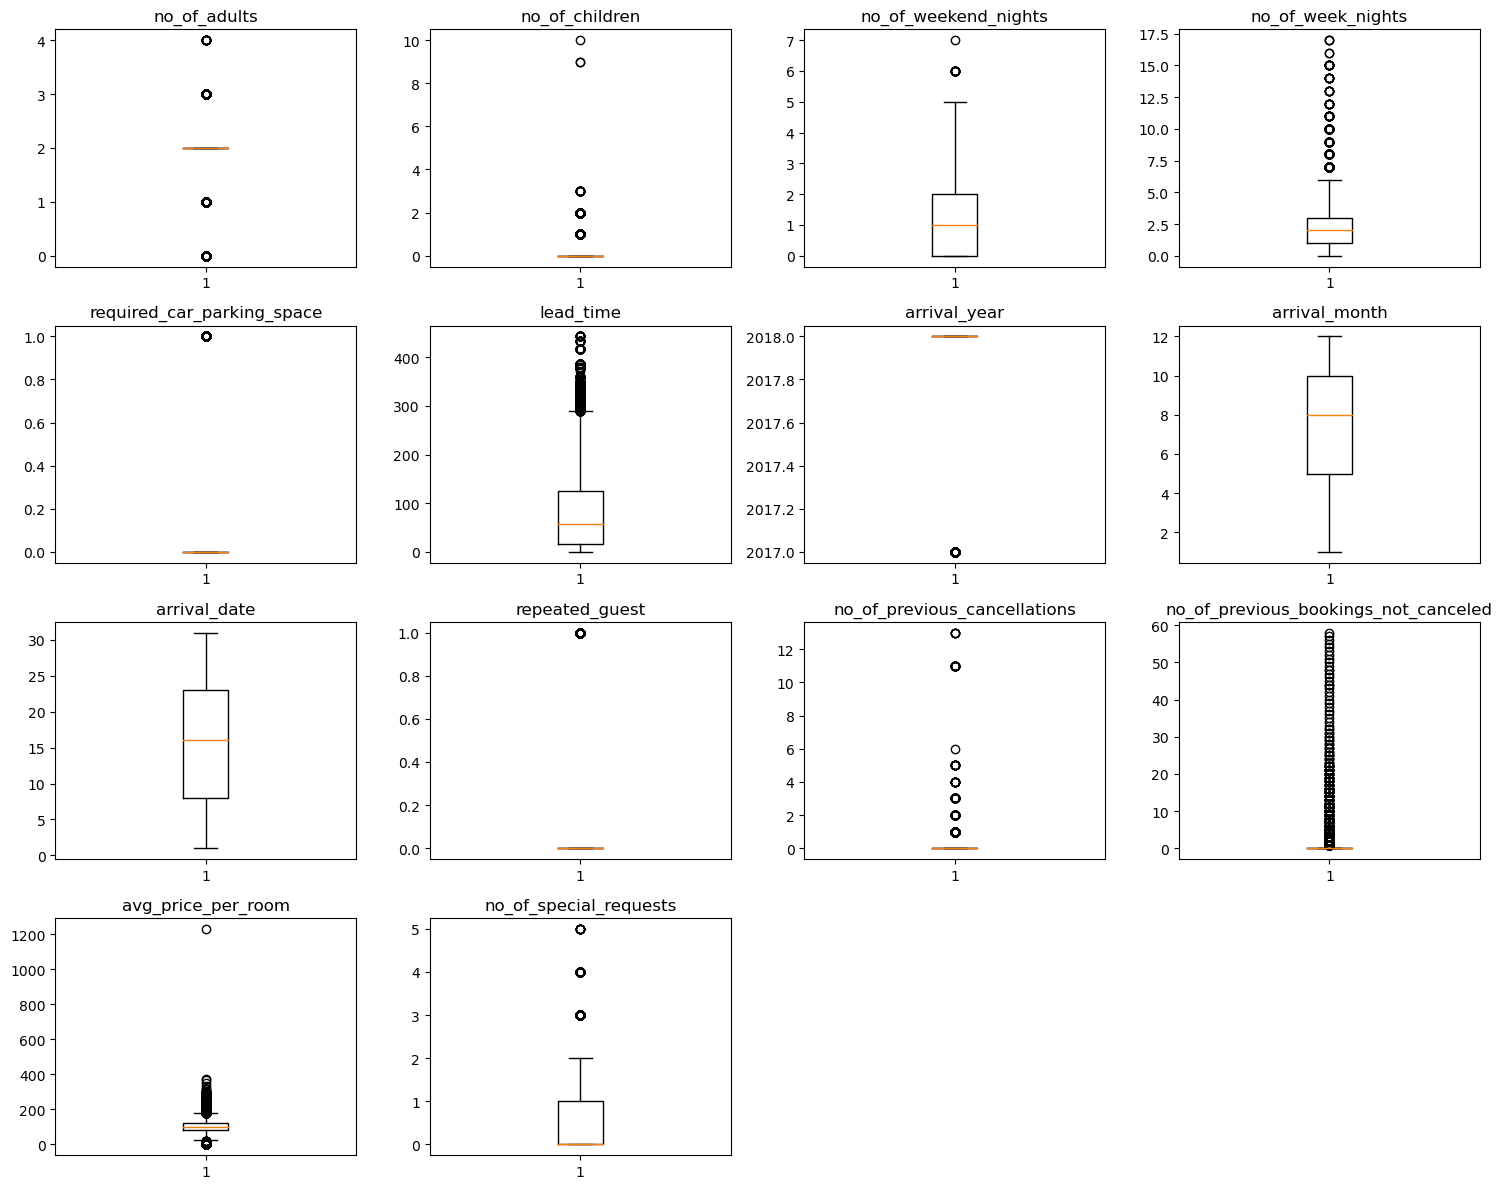

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Although there are outliers in most of columns we are not going to treat them since they may real numbers.

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

### Model Building Process

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Data Processing for for Logistic Regression

### Spliting the data into train and test to be able to evaluate the model that we build

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67238
1   0.32762
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67233
1   0.32767
Name: booking_status, dtype: float64


### Building  Logistic Regression model

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

# let's print the logistic regression summary
print(lg.summary())

         Current function value: 0.422351
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.3322
Time:                        11:25:12   Log-Likelihood:                -10724.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -886.9744    121.332     -7.310      0.000   -1124.782

Observations

- Negative values of the coefficient show that the probability of a guest's booking cancellation decreases with the     increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of booking cancellation increases with the increase of   the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be     0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80687,0.63313,0.73985,0.68234


- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Multicollinearity

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,39443302.41897
1,no_of_adults,1.34276
2,no_of_children,2.00484
3,no_of_weekend_nights,1.06692
4,no_of_week_nights,1.09423
5,required_car_parking_space,1.03470
6,lead_time,1.39962
7,arrival_year,1.42773
8,arrival_month,1.27441
9,arrival_date,1.00760


- As we can see,  Corporate, offline and Online market segments have hihg VIF and needs to be drop.

#### Dropping high P-value variables

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
# fitting the model on training set
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

# let's print the logistic regression summary
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.422989
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.3312
Time:                        11:25:15   Log-Likelihood:                -10741.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -869.9027    120.911     -7.195    

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.16163,1.03686,0.19893,1.01601,1.53691,0.95203,0.04620,1.33534,1.01923,0.22639,1.18161,1.23348,0.68837,0.76504,0.50262,0.47623,0.26848,0.41852,0.16991
Change_odd%,-100.00000,16.16273,3.68570,-80.10659,1.60144,53.69106,-4.79749,-95.37974,33.53399,1.92266,-77.36107,18.16085,23.34812,-31.16344,-23.49604,-49.73802,-52.37683,-73.15196,-58.14845,-83.00900


### Coefficient interpretations

* `weekend nights`: Holding all other features constant, a unit change in weeked nights will increase the odds of guests canceling their booking by 1.16  times or a 16.16% increase in the odds of a guest canceling their booking.

* `week night`: Holding all other features constant, a unit change in week night will increase the odds of guest canceling  his booking  by 1.03 time  times or a 3.68% increase in the odds of having to cancel his booking.

* `lead time `: Holding all other features constant, a unit change in lead time  will increase the odds of a person canceling his booking  by 1.01 times or a 1.60% increase in the odds of canceling bookings.

* `arrival months`: Holding all other features constant, a unit change in month  will decrease the odds of a person canceling their booking  by 0.95 times or a -4.80% decrease in the odds of canceling booking.

### Checking model performance on the training set

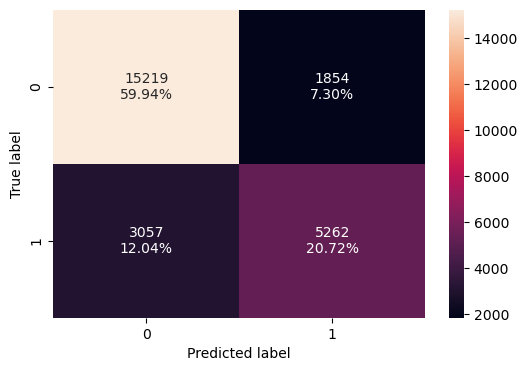

In [ ]:
# creating a confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80659,0.63253,0.73946,0.68183


#### ROC-AUC
* ROC-AUC on training set

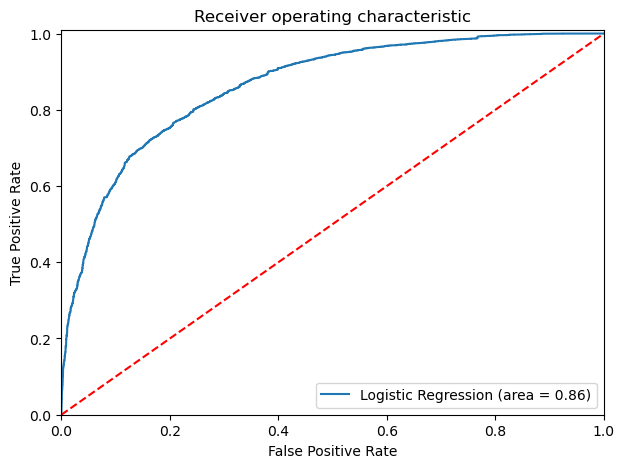

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Model performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3329572525588632


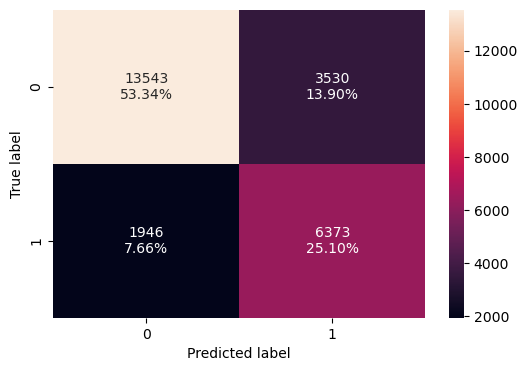

In [ ]:
# creating a confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train,optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78434,0.76608,0.64354,0.69948


### Using Precision-Recall curve to see if we can find a better threshold

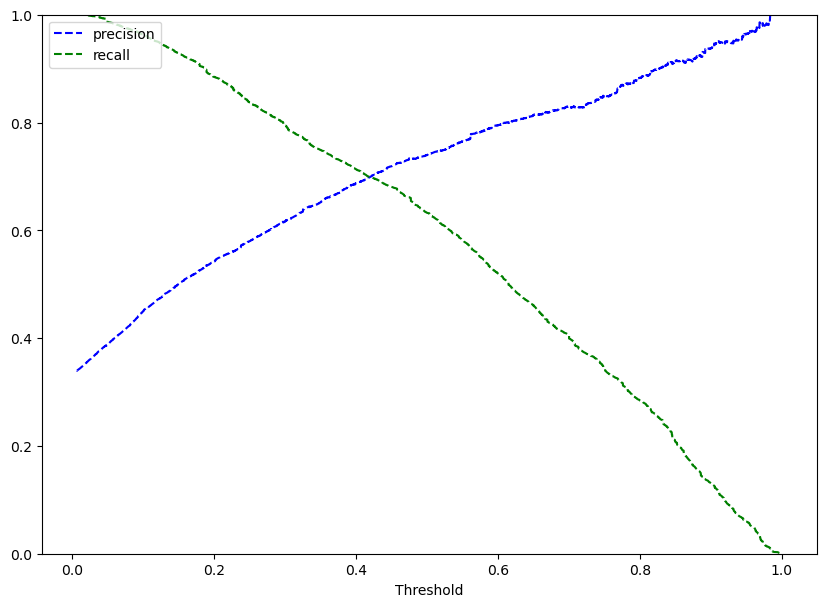

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

### Checking model performance on training set

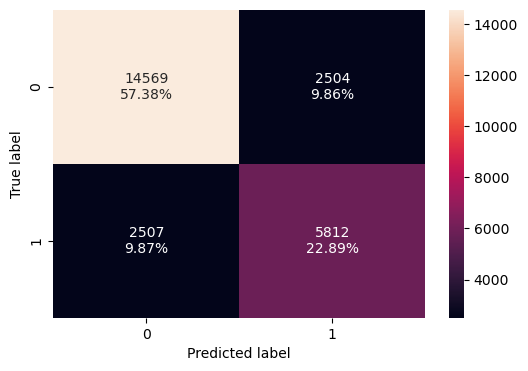

In [ ]:
# creating a confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold = optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80265,0.69864,0.69889,0.69877


## Checking performance on test set.

***Using default threshold***

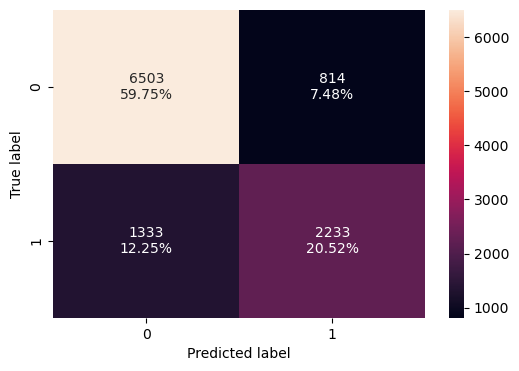

In [ ]:
# creating a confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test,)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
   lg1, X_test1, y_test
)

print("Test Perfomance:")
log_reg_model_test_perf

Test Perfomance:


,Accuracy,Recall,Precision,F1
0,0.80272,0.62619,0.73285,0.67534


### ROC on test Set

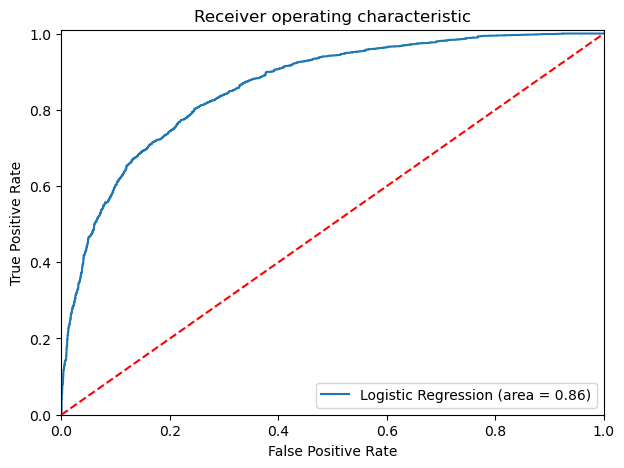

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

***Using a model with threshold=0.37***

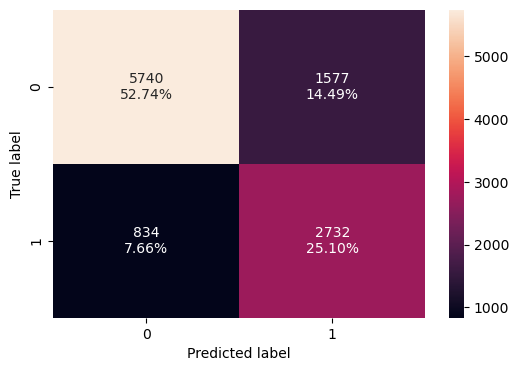

In [ ]:
#creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold= optimal_threshold_auc_roc)

In [ ]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test Perfromance:")
log_reg_model_test_perf_threshold_auc_roc

Test Perfromance:


,Accuracy,Recall,Precision,F1
0,0.77846,0.76612,0.63402,0.69384


***Using model with threshold = 0.42***

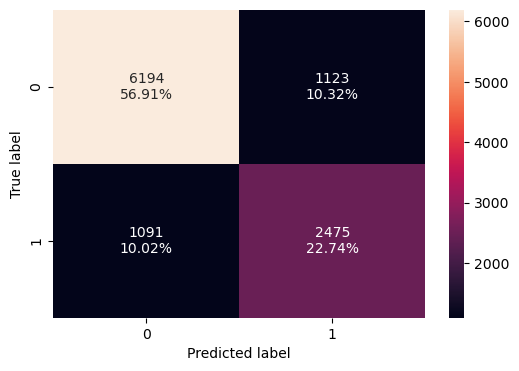

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold= optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79656,0.69405,0.68788,0.69095


### Model performance summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80659,0.78434,0.80265
Recall,0.63253,0.76608,0.69864
Precision,0.73946,0.64354,0.69889
F1,0.68183,0.69948,0.69877


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80272,0.77846,0.79656
Recall,0.62619,0.76612,0.69405
Precision,0.73285,0.63402,0.68788
F1,0.67534,0.69384,0.69095


- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a default threshold (0.37) is giving the best F1 score. Therefore it can be selected as the final model


## Decision Tree

### Data Preparation for modeling(Decision Tree)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = data.drop(["booking_status"] , axis=1)
y = data["booking_status"]

X = pd.get_dummies(X, drop_first= True)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size = 0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


* We had seen that around 67% of observations belongs to class 0 (Not Canceled) and 32.9% observations belongs to class 1 (canceled), and this is preserved in the train and test sets.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


## Model Building

### Decision Tree (default)

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking performance on training test

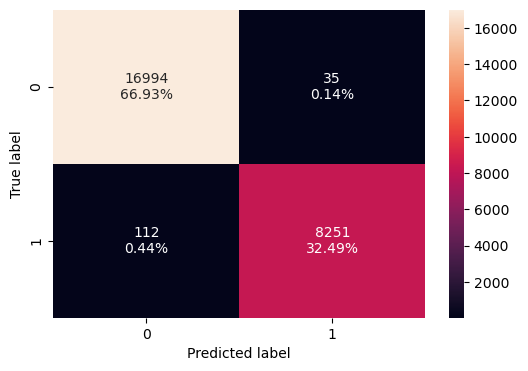

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


In [ ]:
### checking model performance on test set

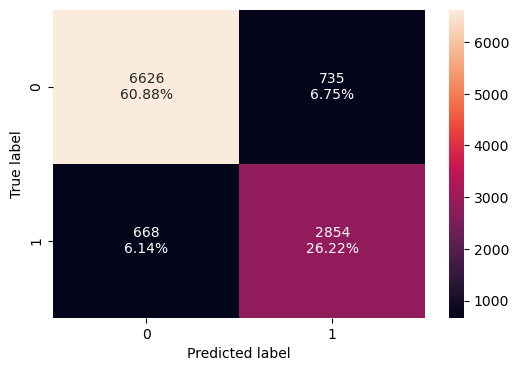

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87108,0.81034,0.79521,0.80270


### Checking important features before pruning

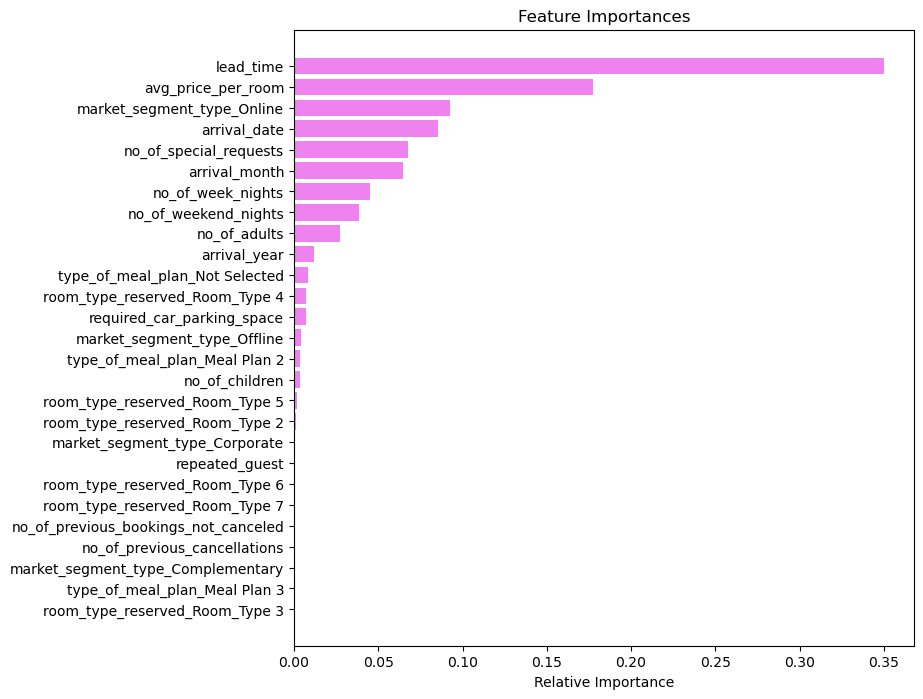

In [ ]:
# improtance of features in the tree building
feature_names = list(X_train.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Pre-pruning**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

### Checking performance on training set

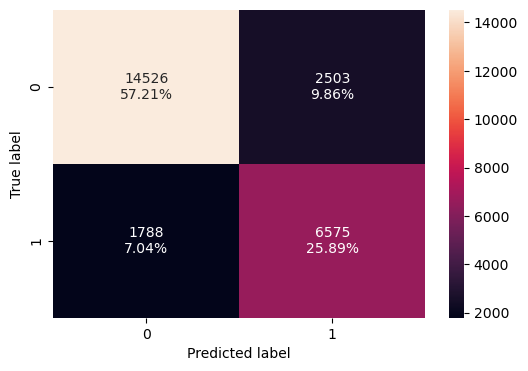

In [ ]:
confusion_matrix_sklearn(estimator,X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83101,0.78620,0.72428,0.75397


### checking performance on the test set

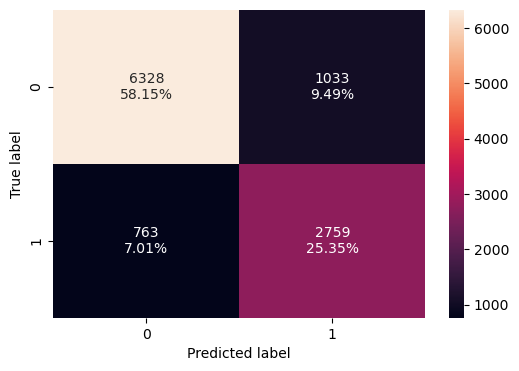

In [ ]:
confusion_matrix_sklearn(estimator,X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


**Visualizing the Decision Tee**

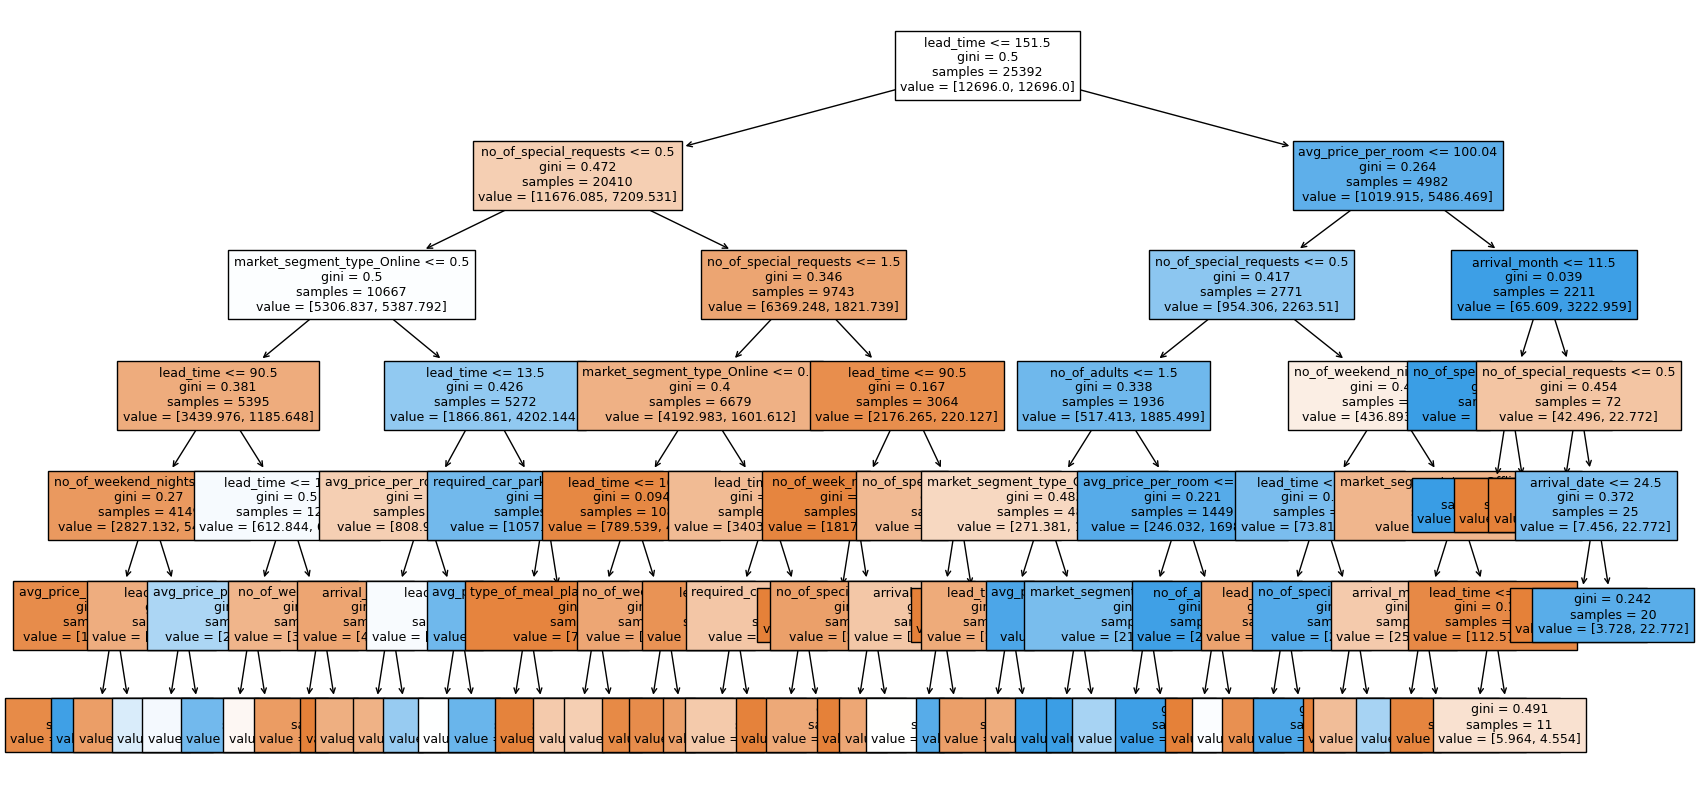

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead time is less than or equal to 151.50, nnumber of of special request is less than or equal to 0.50, market segement online  is less than or equal to 0.50, lead time is less or equal to 90.5  and average prive per room  is greater than 196.50, then the booking  is most likey to be canceled

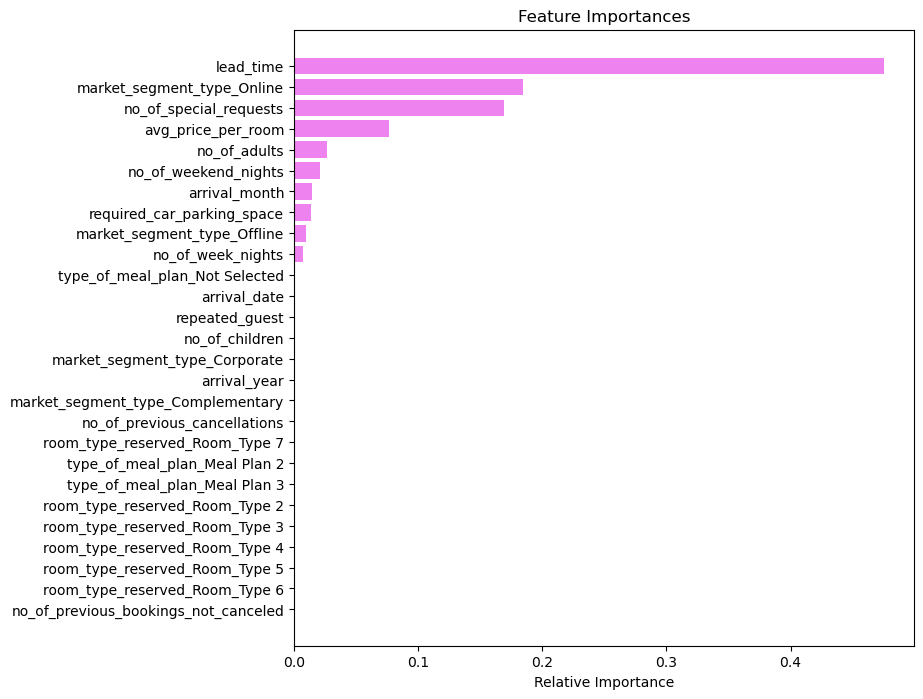

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In the pre pruned decision tree the most important features are lead time, market segment online and special request

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,-0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1837,0.00890,0.32806
1838,0.00980,0.33786
1839,0.01272,0.35058
1840,0.03412,0.41882


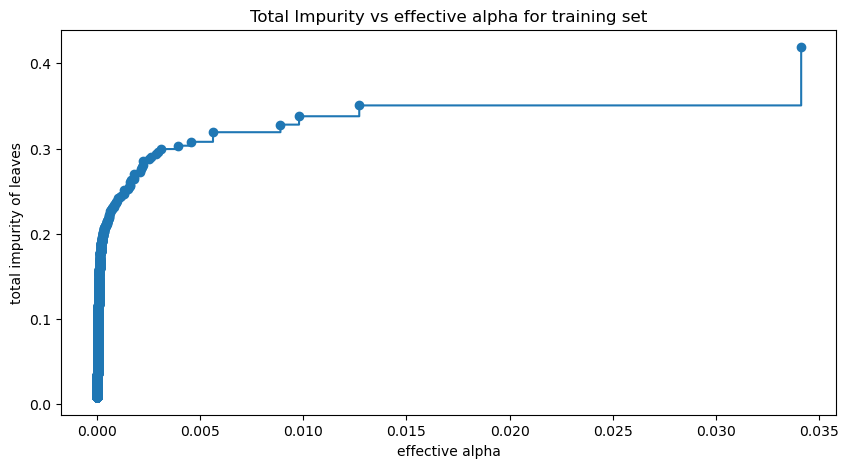

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Training the decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136943


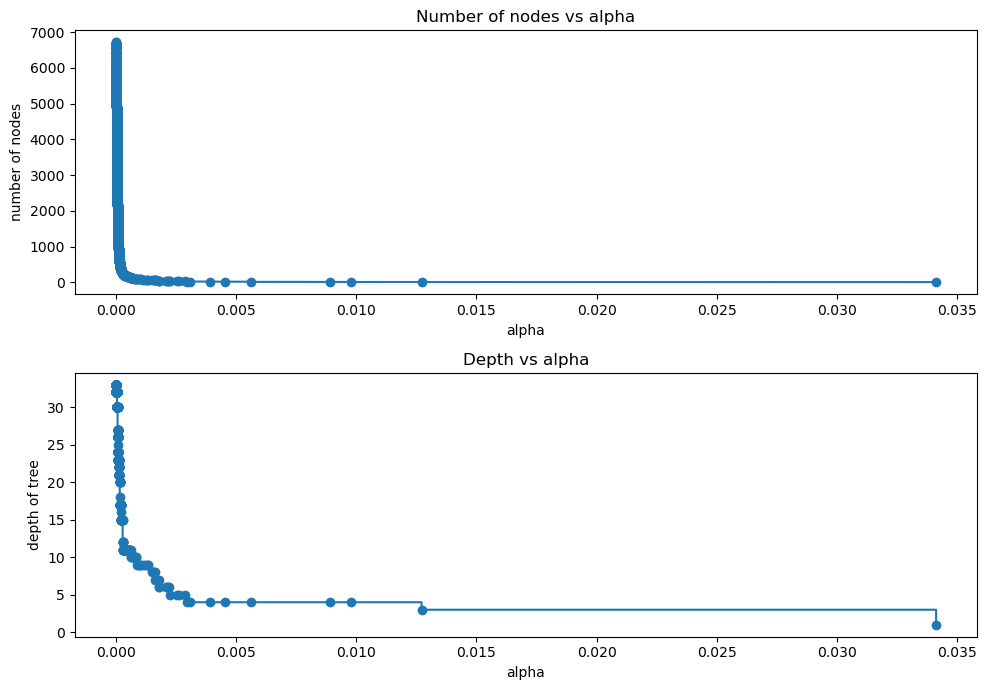

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

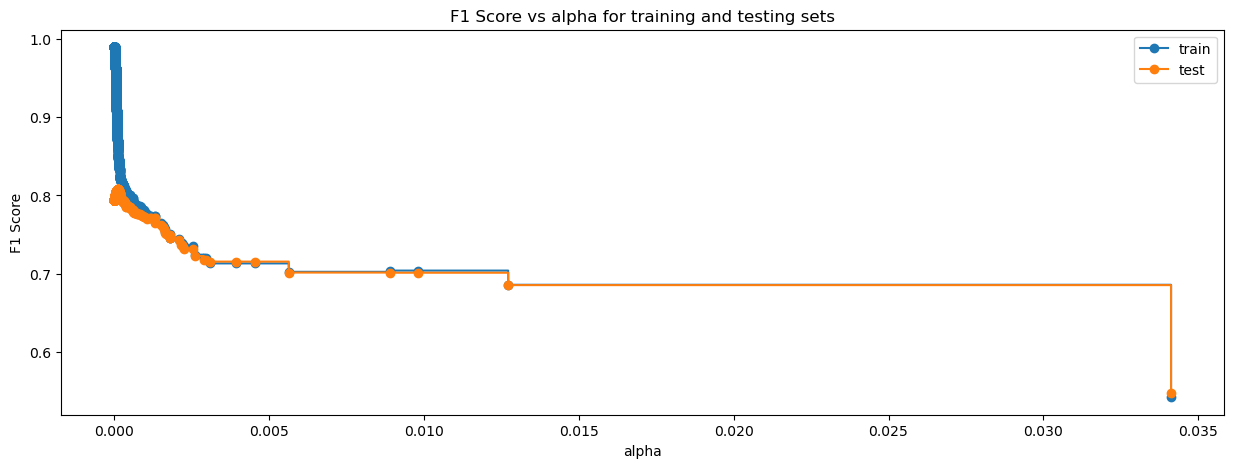

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating a model where we get highest train ann test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001226763315516701, class_weight='balanced',
                       random_state=1)


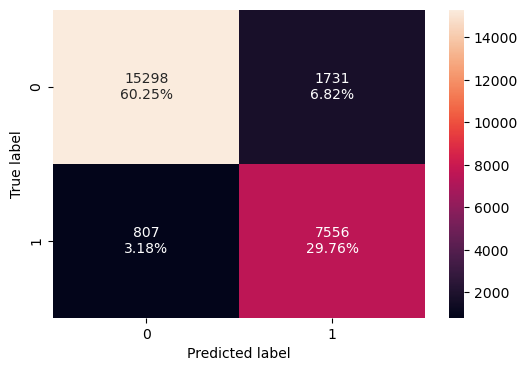

In [ ]:
#confusion_matrix_sklearn(best_model, X_train, y_train)
confusion_matrix_sklearn(best_model,X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.90005,0.90350,0.81361,0.85620


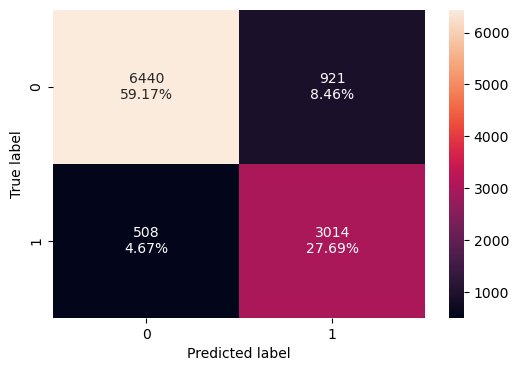

In [ ]:
# confusion_matrix_sklearn(best_model, X_test, y_test)
confusion_matrix_sklearn(best_model,X_test, y_test)

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86869,0.85576,0.76595,0.80837


### Visualizing the Decision tree

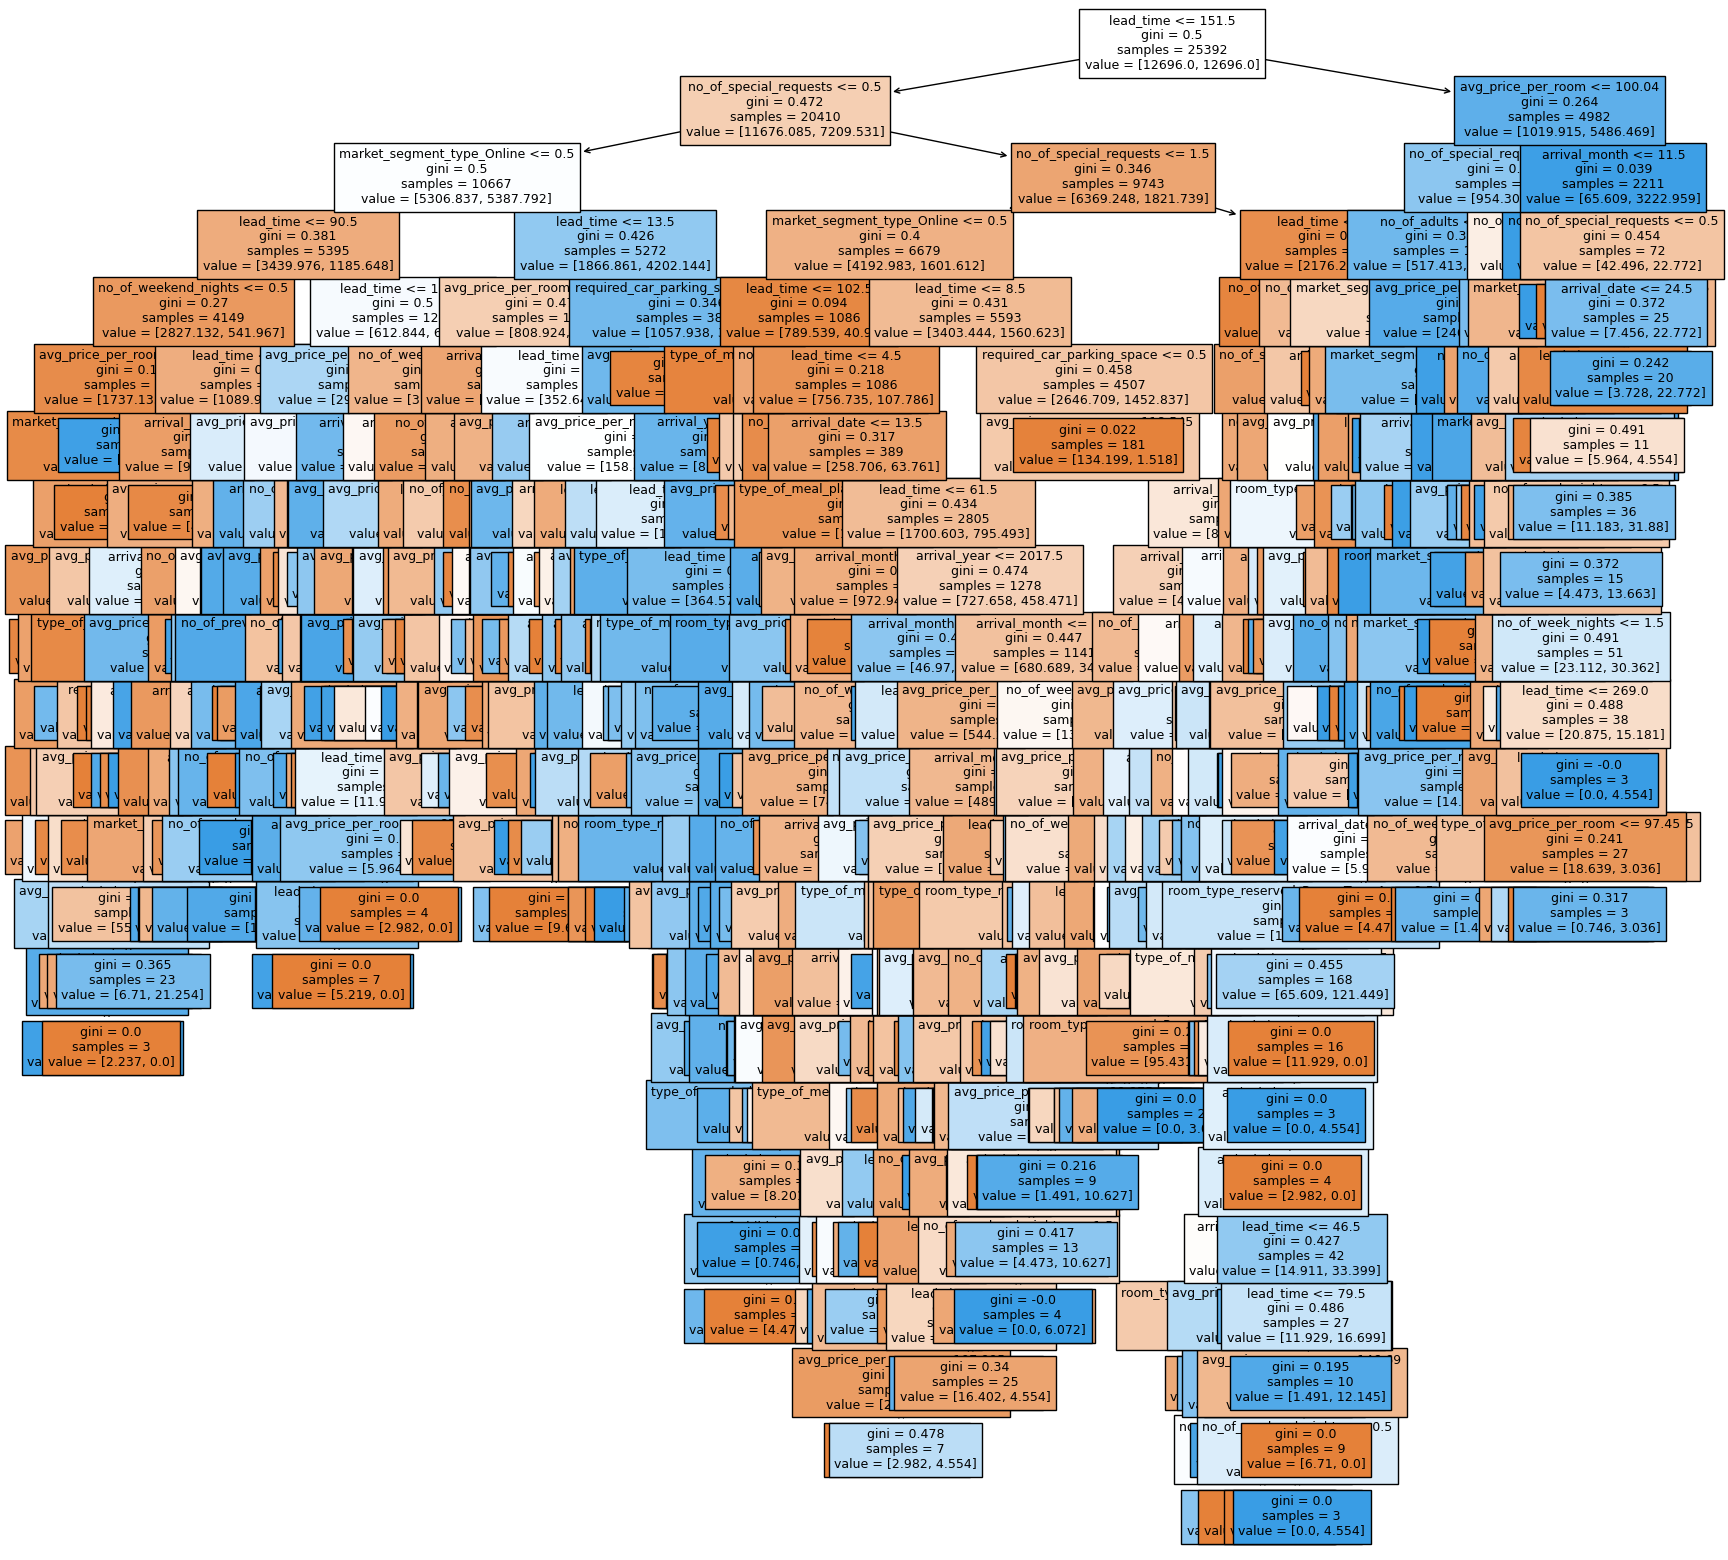

In [ ]:
plt.figure(figsize=(20, 20))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

* If the lead time is less than or equal to 151.50, nnumber of of special request is less than or equal to 0.50,         market segement online  is less than or equal to 0.50, lead time is less or equal to 90.5  and average prive per       room  is greater than 196.50, then the booking  is most likey to be canceled

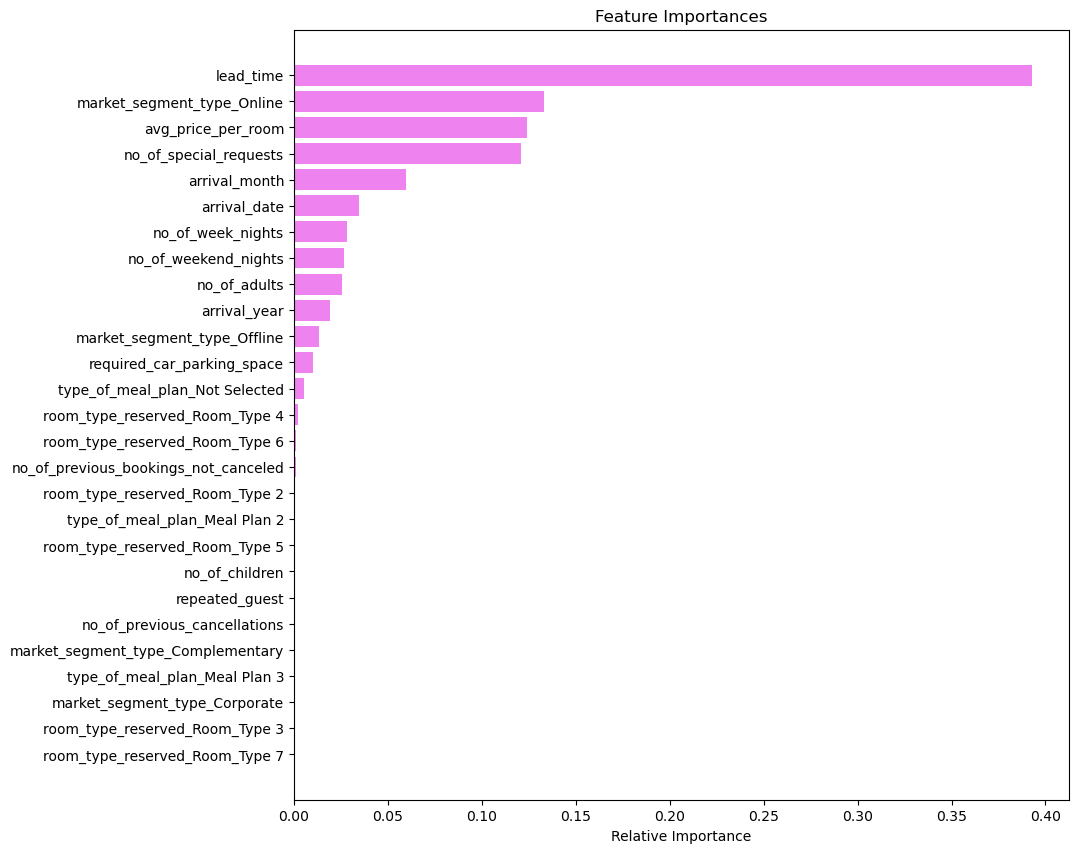

In [ ]:
# importance of features in the tree building

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The most important factor is lead time

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83101,0.90005
Recall,0.98661,0.78620,0.90350
Precision,0.99578,0.72428,0.81361
F1,0.99117,0.75397,0.85620


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87108,0.83497,0.86869
Recall,0.81034,0.78336,0.85576
Precision,0.79521,0.72758,0.76595
F1,0.80270,0.75444,0.80837


* Decision tree models with post-pruning gives the  highest F1 scores on both training and test sets, hence we will     choose it as the best model.

### Insights

#### Logistic Regression
* We have been able to build a predictive model that can be used by INN Hotels Group  to find guest likely to cancel     their hotel booking with f1_score of 0.69 on  the training set.

* All the logistic regression models gave generalized performance on the training and test set.

* Coefficient of Lead time, weekend night, week nighs and arrival year, are positive an increase in these will lead to   increase in chances of a guest canceling his booking.

* Coefficient of car parking space, arrival month, repeated guest and special request are negative increase in these     will lead to decrease in chances of a guest canceling his booking.

#### Decision Tree
- The model built can be used to predict if  guests are going to cancel their bookings or not and can correctly         identify 86.8% of booking cancellations

- lead time, market segment online and average price per room are the most important variables in predicting whether     guest will cancel their bookings  or   not

- From Decsion tree extract,  it has obsrved that  if the lead time is less than or equal to 151.50, nnumber of of       special request is less than or equal to 0.50, market segement online  is less than or equal to 0.50, lead time is     less or equal to 90.5 and average prive per room  is greater than 196.50, then the booking  is most likey to be       canceled

## Recommendations
- INN Hotels Group should implement a non-refundable cancellation policy when a guest decides to cancel his booking in   the 24 hours leading to check in.
- There should be a pratial refund to guest based on a percentage of the booking value if the guest decides to cancel   booking day leading to their stay, the percentage must increase as check-in approaches
- Compnay must choose to implement a stricter policy for groups since cancellation will cause a lot of losses to INN     Hotels Group. The most appropriate poilcy will be a full non-refundable one.
- The company should give a vigilant eye for these values that increae the chance of booking cancellation to minimized   cancellations.   

